In [1]:
import numpy as np
import csv
import itertools
import matplotlib
%matplotlib inline
import seaborn as sb
from matplotlib import pyplot as plt
from cycler import cycler
import datetime
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import pwlf

In [2]:
import sys
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
sys.executable


'/usr/local/opt/python/bin/python3.7'

In [4]:
matplotlib.__version__

'3.2.1'

In [5]:
def Float(x):
    try:
        rtn = float(x)
    except:
        rtn = float('NaN')
    return rtn

## JHU data

In [6]:
def get_data(jhu_file):
    dat = []
    with open(jhu_file, newline='') as csvfile:
        myreader = csv.reader(csvfile, delimiter=',')
        popdat = []
        i = 0
        for row in myreader:
            if i != 0:
                poplist = []
                j = 0
                for elt in row:
                    if j >= 4:
                        poplist.append(int(elt))
                    elif j == 0:
                        poplist.append(elt)
                    elif j == 1:
                        poplist[0]=(elt,poplist[0])
                    j = j+1
                popdat.append(poplist)
            else:
                popdat.append(row)
            # print(popdat[i])
            i = i + 1;
    # dates
    popdat0=['dates']
    for elt in popdat[0][4:]:
        popdat0.append(elt)
    popdat[0] = [pop for pop in popdat0]
    print('popdat[0]',popdat[0])
    # totals over all countries
    totals = np.zeros(len(popdat[0])-1,dtype=int)
    for row in popdat[1:]:
        totals = totals + np.array(row[1:])
    totals = list(np.asarray(totals))
    # print(totals)
    popkeyed = {poplist[0]: poplist[1:] for poplist in popdat}
    popkeyed.update({'dates':popdat[0][1:]})
    popkeyed.update({('World',''):totals})
    # del popkeyed[('d','a')]
    # assemble totals for countries with multiple regions
    total = np.zeros(len(popkeyed['dates']),dtype=int)
    poptotkeyed = {}
    for country,tseries in popkeyed.items():
        if country!='dates' and country[1] != '':                           # seems that UK is single exception with both '' and non '' regions, UK total is then UK overseas
            countrytotal = (country[0],'Total')
            if countrytotal in poptotkeyed:
                # print(country,popkeyed[country],poptotkeyed[countrytotal])
                total = np.array(tseries)[:]+np.array(poptotkeyed[countrytotal])[:]
            else:
                total =  np.array(tseries)                        
            poptotkeyed.update({countrytotal:list(total)})
    for countrytotal,tseries in poptotkeyed.items():
        total = np.array(tseries)
        popkeyed.update({countrytotal:list(total)})
    return popkeyed

In [7]:
base = '../covid-19-JH/csse_covid_19_data/csse_covid_19_time_series/'
confirmed = get_data(base+'time_series_covid19_confirmed_global.csv')
deaths = get_data(base+'time_series_covid19_deaths_global.csv')
recovered = get_data(base+'time_series_covid19_recovered_global.csv')
covid_ts = {'confirmed':confirmed,'deaths':deaths,'recovered':recovered}
countries_jhu = [(row[0],row[1]) for row in confirmed][1:]
print("number of countries listed",len(countries_jhu))
i=0
for country in countries_jhu:
    print(i,country)
    i = i + 1

popdat[0] ['dates', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4/22/

In [8]:
print(confirmed['dates'])

['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4/22/20', '4/23/20', '4/

In [9]:
country_Oxford_JHU = {}
country_Oxford_JHU.update({('Cape Verde', ''):('Cabo Verde', '')})
country_Oxford_JHU.update({('Aruba', ''):('Netherlands', 'Aruba')})
country_Oxford_JHU.update({('Bermuda', ''):('United Kingdom', 'Bermuda')})
country_Oxford_JHU.update({('Hong Kong', ''):('China', 'Hong Kong')})
country_Oxford_JHU.update({('Czech Republic', ''):('Czechia', '')})
country_Oxford_JHU.update({('China', ''):('China', 'Total')})          # split in database : sums to Total need to be done
country_Oxford_JHU.update({('Slovak Republic', ''):('Slovakia', '')})
country_Oxford_JHU.update({('Congo', ''):('Congo (Brazzaville)', '')}) # two Congos, this is Rep. of Congo, other is Democratic Republic of Congo
country_Oxford_JHU.update({('Democratic Republic of Congo', ''):('Congo-Kinshasa','')})
country_Oxford_JHU.update({('Solomon Islands', ''):('Solomon Islands', '')}) # Not present in JHU list: sovereign state poln 650000
country_Oxford_JHU.update({('South Korea', ''):('Korea, South', '')})
country_Oxford_JHU.update({('Turkmenistan', ''):('Turkmenistan', '')}) # Not present in JHU list: 5.6M people in Central Asia
country_Oxford_JHU.update({('Myanmar', ''):('Thailand', '')})
country_Oxford_JHU.update({('United States', '') : ('US', '')})
country_Oxford_JHU.update({('Australia', ''):('Australia', 'Total')})  # split in database : sums to Total need to be done
country_Oxford_JHU.update({('Puerto Rico', ''):('United States','Puerto Rico')})   # not found in inspection of JHU list, territory of US
country_Oxford_JHU.update({('Palestine', ''):('West Bank and Gaza', '')})
country_Oxford_JHU.update({('Timor', ''):('Timor-Leste', '')})         # check two Timors, East Timor
country_Oxford_JHU.update({('Canada', ''):('Canada', 'Total')})        # split in database : sums to Total need to be done
country_Oxford_JHU.update({('Greenland', ''):('Denmark', 'Greenland')})
country_Oxford_JHU.update({('Macao', ''):('China', 'Macau')})
country_Oxford_JHU.update({('Kyrgyz Republic', ''):('Kyrgyzstan', '')})
country_Oxford_JHU.update({('Taiwan', ''):('Taiwan*', '')})
country_Oxford_JHU.update({('Guam', ''):('United States','Guam')})     # not found in inspection of JHU list, territory of US

In [10]:
def plotCountry(country_s, datatype='confirmed', dataaccum='cumulative', fittype=None, ax=None, ax2=False,
                symbol='o--', step=None, firstdate=None, lastdate=None, intdates=False, linecolor=None):
    """ plots selected data for a list of countries or single country
        datatypes allowed are 'confirmed','deaths','recovered'
        dataaccum specifies either 'cumulative' or 'daily' or averaged over 7 days 'cum_av_weekly' or 'daily_av_weekly'
        fittypes allowed are currently None, 'piecewise-linear'
        ax graphical axes to use for plot: default None -> new axes
        ax2 true if second axes as twin axes for overlay plotting
        symbol to use for plotting
        step whether to use step plotting instead of points: default None -> points
        firstdate to plot (maybe before first date in data - pad with 0)
        lastdate to plot (maybe after last date in data - pad with 0)
        intdates : whether to plot dates as integers for compatibility (default as dates)
        linecolor is default color to use for a single trace, instead of listed set)
    """
    # extract list of countries in [(country,region),...] format from first parameter
    countries = []
    if isinstance(country_s,list):
        for country in country_s:
            if isinstance(country,str):
                country = (country,'')
            countries.append(country)
    elif isinstance(country_s,str):
        countries = [(country_s,'')]
    else:                               # single ('country','reg') entry
        countries = [country_s]
        
    # get data with datatype and extend dates to padd desired interval specified by firstdate,lastdate
    popkeyed = covid_ts[datatype]
    dates = popkeyed['dates']
    fmt = '%m/%d/%y'
    xx = [datetime.datetime.strptime(dd,fmt) for dd in dates ]
    if firstdate:
        firstdate_d = datetime.datetime.strptime(firstdate,fmt)
    else:
        firstdate_d = datetime.datetime.strptime(dates[0],fmt)
    if lastdate:
        lastdate_d = datetime.datetime.strptime(lastdate,fmt)
    else:
        lastdate_d = datetime.datetime.strptime(dates[-1],fmt)
    daystart = (firstdate_d-xx[0]).days
    daystop = (lastdate_d-xx[-1]).days
    if daystart <0:
        xx0 = [xx[0]+datetime.timedelta(days=i) for i in range(daystart,0)]
        yy0 = [0.]*(-daystart)
    else:
        xx0 = []
        yy0 = []
    if daystop > 0:
        xx1 = [xx[-1]+datetime.timedelta(days=i) for i in range(daystop)]
        yy1 = [0.]*(daystop)
    else:
        xx1 = []
        yy1 = []       
    xx = xx0 + xx + xx1
    
    # print('len xx',len(xx))
    if fittype == 'piecewise-linear':
        xxi = [Float((x-firstdate_d).days) for x in xx ]
        # print(xxi)
        
    # locator = mdates.MonthLocator()
    locator = mdates.AutoDateLocator(minticks=5, maxticks=13)
    formatter= mdates.ConciseDateFormatter(locator)
    
    if not ax:
        fig,ax = plt.subplots(1,1,figsize=(20,10)) 
        ax2 = ax
    elif ax2:
        ax2 = ax.twinx()
    else:
        ax2 = ax
    colors =  ['k', 'b', 'c', 'm', 'y', 'g', 'r']
        
    i = 0
    j = 0
    for country in countries:
        try:
            yy = popkeyed[country]
            j = j+1
        except:
            print('country not found',country)
            i = i + 1
            continue
        yyf = [Float(y) for y in yy]
        yy = yy0 + yyf + yy1
        # print('len yy',len(yy))
        # ymax=np.max(np.array(yy))
        yyf = [Float(y) for y in yy]
        if dataaccum == 'daily':
            yy = [0.]*len(yy)
            yy[0] = yyf[0]
            for k in range(1,len(yy)):
                yy[k] = yyf[k]-yyf[k-1]   
        elif dataaccum == 'cum_av_weekly':
            yy = [0.]*len(yy)
            moving_av = 0.
            for k in range(len(yy)):
                if k-7 >= 0:
                    moving_av = moving_av - yyf[k-7]
                moving_av = moving_av + yyf[k]
                yy[k] = moving_av/min(7.0,float(k+1))
        elif dataaccum == 'daily_av_weekly':
            yy = [0.]*len(yyf)
            yy[0] = yyf[0]
            for k in range(1,len(yy)):
                yy[k] = yyf[k]-yyf[k-1]
            yyf = [y for y in yy]
            yy = [0.]*len(yy)
            moving_av = 0.
            for k in range(len(yy)):
                if k-7 >= 0:
                    moving_av = moving_av - yyf[k-7]
                moving_av = moving_av + yyf[k]
                yy[k] = moving_av/min(7.0,float(k+1))
        if intdates:
            xx = range(len(xx))
        if step:
            ax2.step(xx,yy,label = country[0])
        else:
            # print(ax,ax2)
            # ax2.set_ylim(ymax,0)
            if linecolor:
                color = linecolor
            else:
                color = colors[i]
            ax2.plot(xx, yy, symbol, color = color, alpha=0.8, label = country[0])

        plt.title(country[0]+'-'+country[1])  # +' '+datatype)
        if fittype == 'piecewise-linear':    
            # initialize piecewise linear fit with your x and y data
            yyf = [Float(y) for y in yy]
            my_pwlf = pwlf.PiecewiseLinFit(xxi, yyf)
            # fit the data for four line segments
            res = my_pwlf.fit(4)
            # predict for the determined points
            xHat = np.linspace(min(xxi), max(xxi), num=len(xx))
            # print(len(xHat),len(xxi))
            yHat = my_pwlf.predict(xHat)
            ax2.plot(xx, yHat, color = colors[i], alpha=0.5, label = country[0]+' fit')
        i = i+1

    if j==0:
        ax.axis("off")
    else:
        if j > 1:
            plt.legend(loc="upper left")
            plt.title('countries '+datatype+dataaccum)
        if not intdates:
            ax2.xaxis.set_major_formatter(formatter)
            ax2.xaxis.set_major_locator(locator)
            for tick in ax2.get_xticklabels():
                tick.set_rotation(40)



In [11]:
 def get_country_data(country_s='World', datatype='confirmed', firstdate=None, lastdate=None):
    if isinstance(country_s,str):
        country = (country_s,'')
    else:                               # single ('country','reg') entry
        country = country_s
    popkeyed = covid_ts[datatype]
    
    dates = popkeyed['dates']
    fmt = '%m/%d/%y'
    xx = [datetime.datetime.strptime(dd,fmt) for dd in dates ]
    if firstdate:
        firstdate_d = datetime.datetime.strptime(firstdate,fmt)
    else:
        firstdate_d = datetime.datetime.strptime(dates[0],fmt)
    if lastdate:
        lastdate_d = datetime.datetime.strptime(lastdate,fmt)
    else:
        lastdate_d = datetime.datetime.strptime(dates[-1],fmt)    
    daystart = (firstdate_d-xx[0]).days
    daystop = (lastdate_d-xx[-1]).days
    
    if daystart <0:
        xx0 = [xx[0]+datetime.timedelta(days=i) for i in range(daystart,0)]
        yy0 = [0.]*(-daystart)
    else:
        xx0 = []
        yy0 = []
    if daystop > 0:
        xx1 = [xx[-1]+datetime.timedelta(days=i) for i in range(daystop)]
        yy1 = [0.]*(daystop)
    else:
        xx1 = []
        yy1 = []       
    xx = xx0 + xx + xx1
    xxf = [Float((x-firstdate_d).days) for x in xx ]

    try:
        yy = popkeyed[country]
        # print(country)
    except:
            print('country data not found',country)
            return None,None,None
    yyf = [Float(y) for y in yy]
    yy = yy0 + yyf + yy1
    return xx,xxf,yy 



In [12]:
xx,xxf,yy = get_country_data('Germany','confirmed',firstdate='01/01/20',lastdate='06/5/20')
print(xxf)
print(yy)
xx,xxf,yy1 = get_country_data('Germany','recovered',firstdate='01/01/20',lastdate='06/5/20')
print(yy)
xx,xxf,yy2 = get_country_data('Germany','deaths',firstdate='01/01/20',lastdate='06/5/20')
print(yy)
y = [[yy[i],yy1[i],yy2[i]] for i in range(len(yy))]
print(y)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0]
[0.0, 0.0,

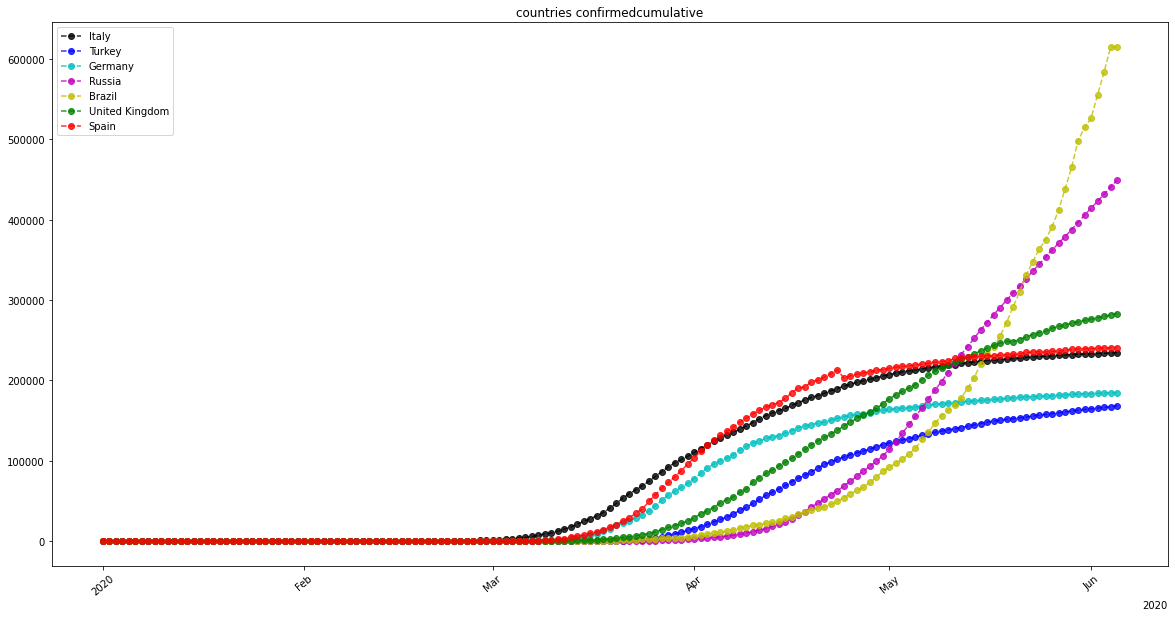

In [13]:
plotCountry(['Italy','Turkey','Germany','Russia','Brazil','United Kingdom','Spain'],'confirmed','cumulative',firstdate='01/01/20',lastdate='06/5/20')

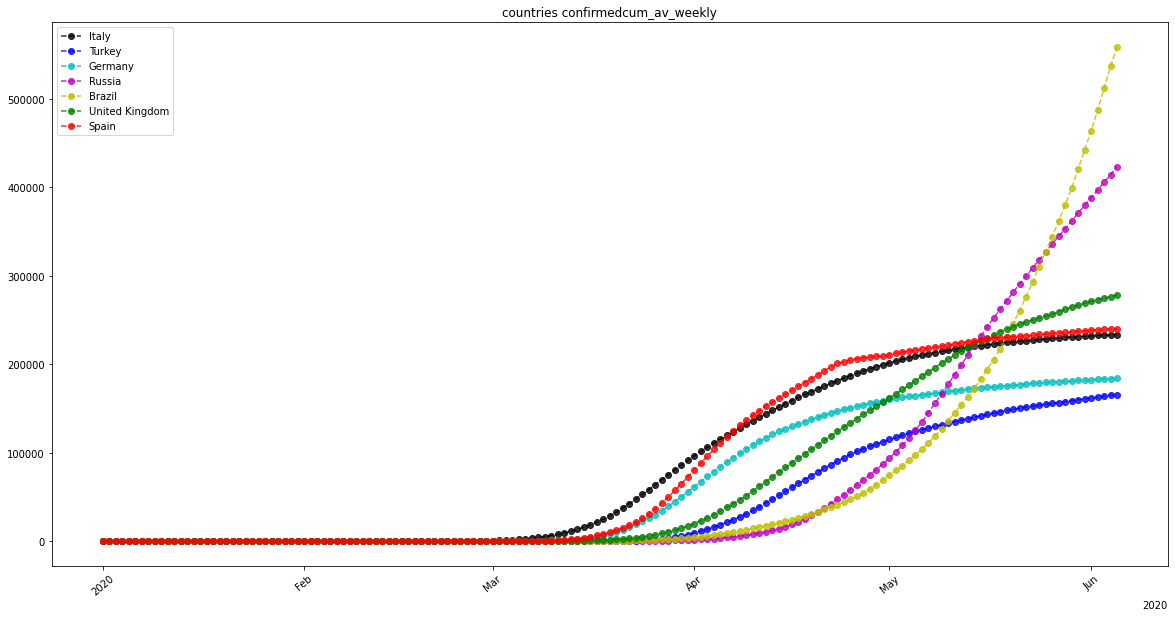

In [14]:
plotCountry(['Italy','Turkey','Germany','Russia','Brazil','United Kingdom','Spain'],'confirmed','cum_av_weekly',firstdate='01/01/20',lastdate='06/5/20')

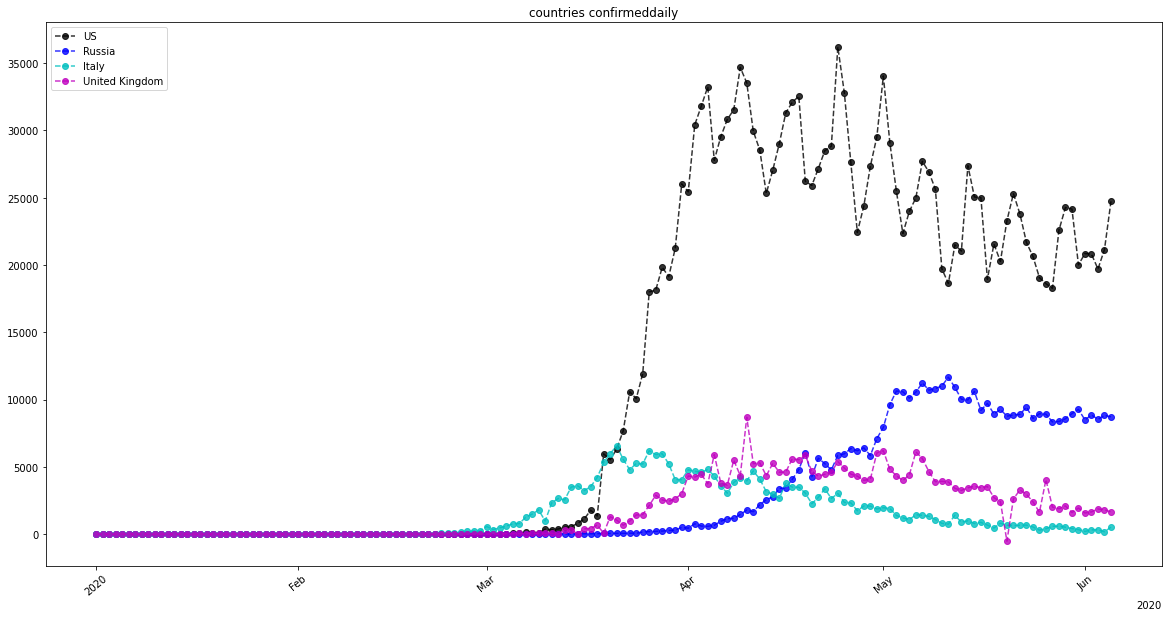

In [15]:
plotCountry(['US','Russia','Italy','United Kingdom'],'confirmed','daily',firstdate='01/01/20',lastdate='06/5/20')

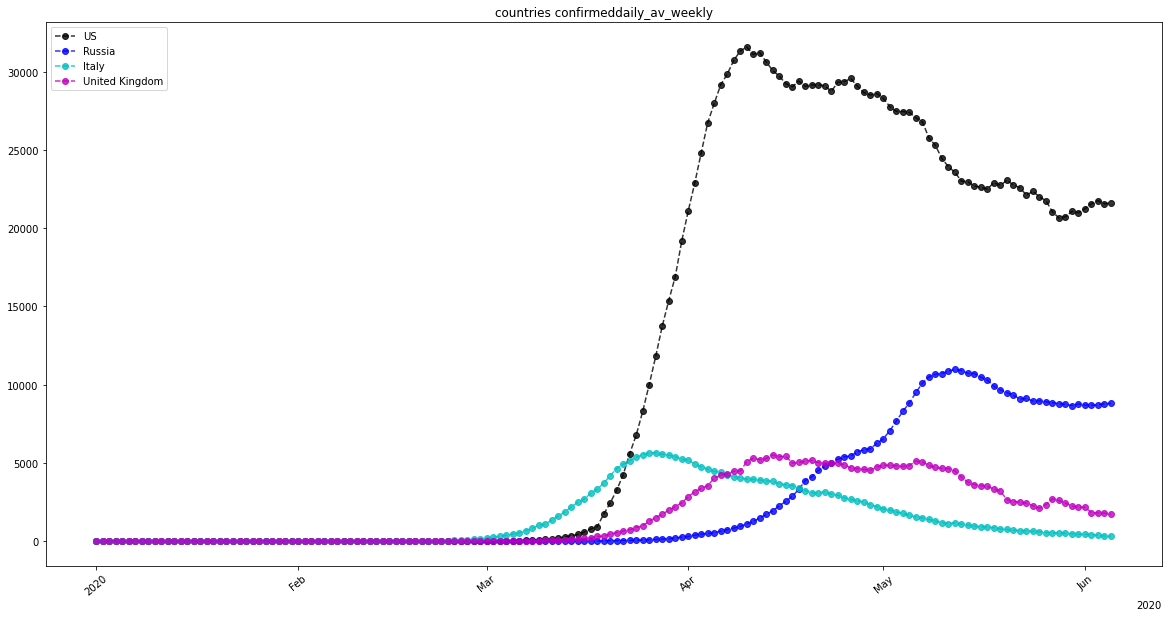

In [16]:
plotCountry(['US','Russia','Italy','United Kingdom'],'confirmed','daily_av_weekly',firstdate='01/01/20',lastdate='06/5/20')

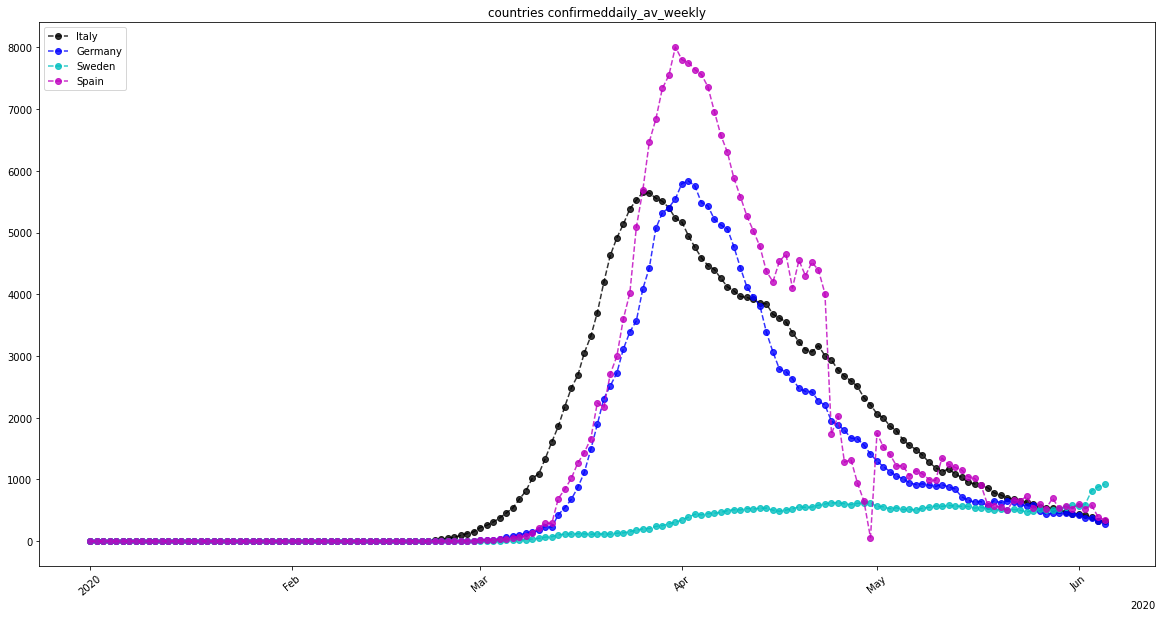

In [17]:
plotCountry(['Italy','Germany','Sweden','Spain'],'confirmed','daily_av_weekly',firstdate='01/01/20',lastdate='06/5/20')

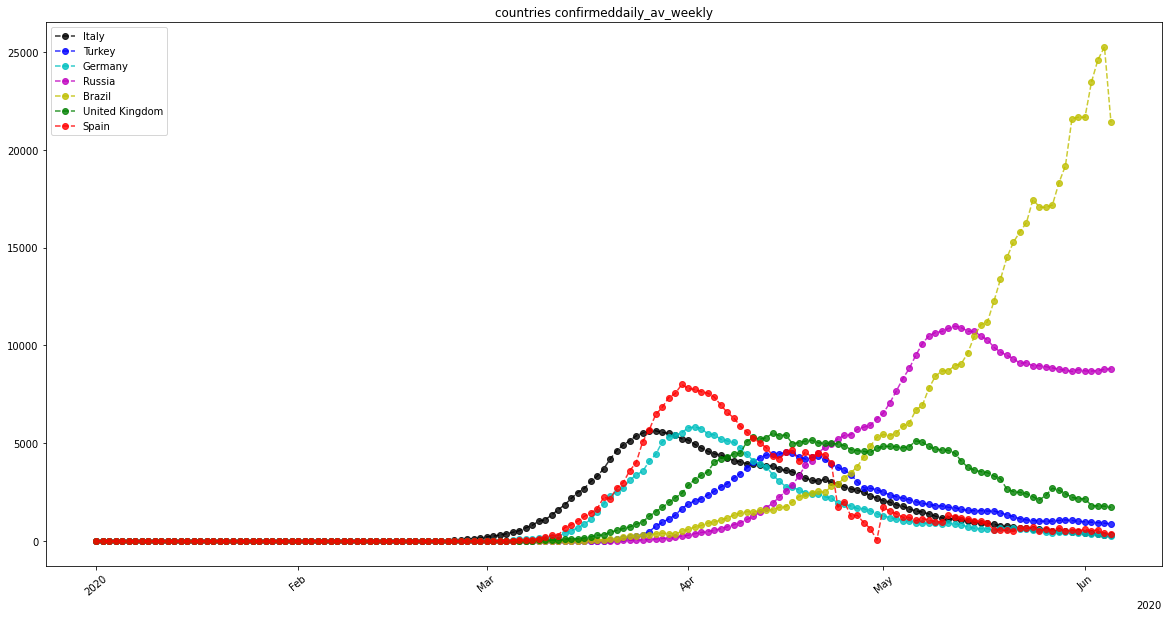

In [18]:
plotCountry(['Italy','Turkey','Germany','Russia','Brazil','United Kingdom','Spain'],'confirmed','daily_av_weekly',firstdate='01/01/20',lastdate='06/5/20')

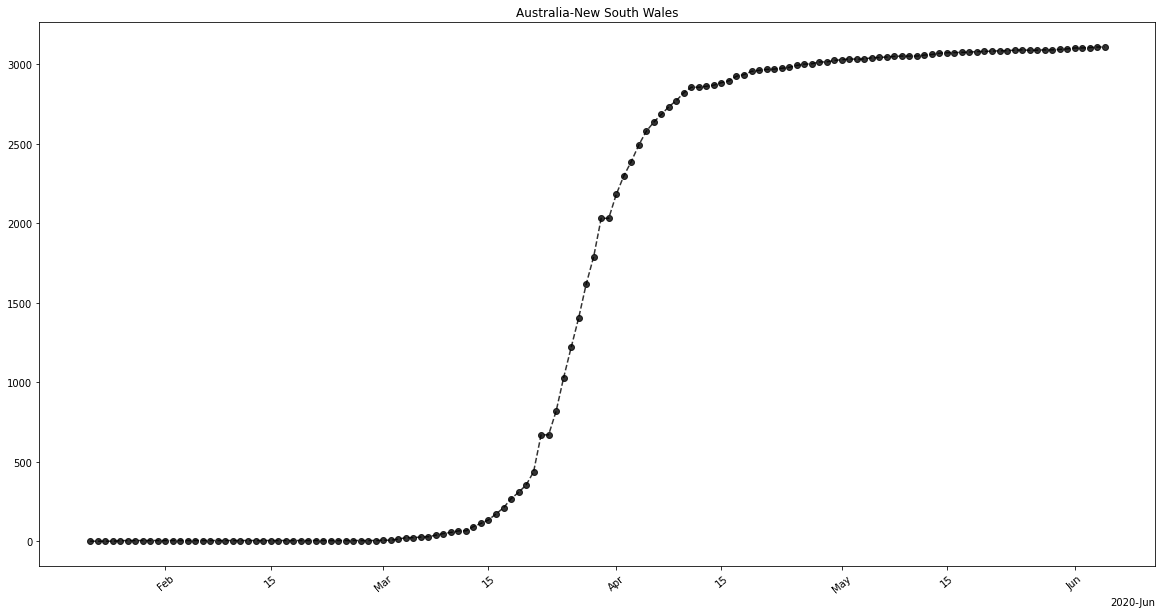

In [19]:
plotCountry(('Australia','New South Wales'),'confirmed','cumulative',None)
#plotCountry(('Austria',''))

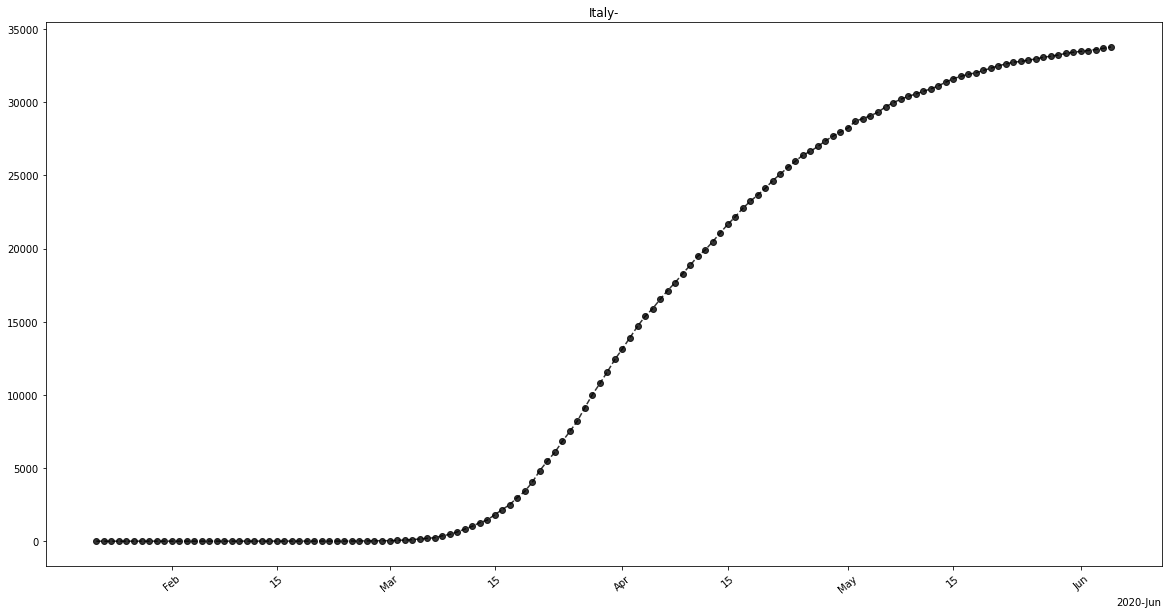

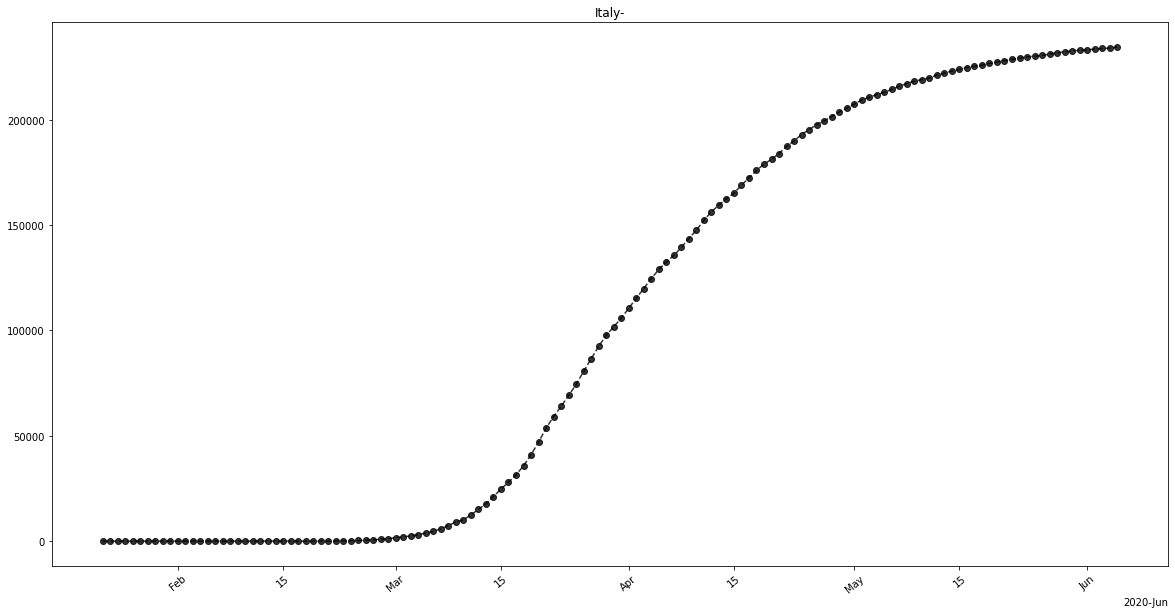

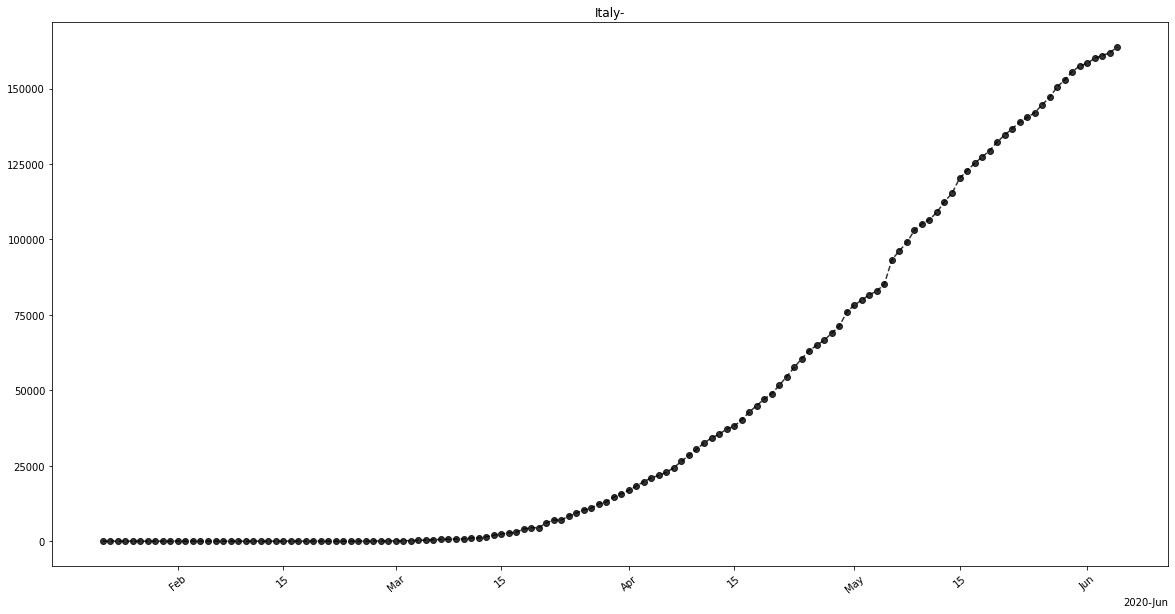

In [20]:
plotCountry('Italy','deaths')
plotCountry('Italy','confirmed')
plotCountry('Italy','recovered')

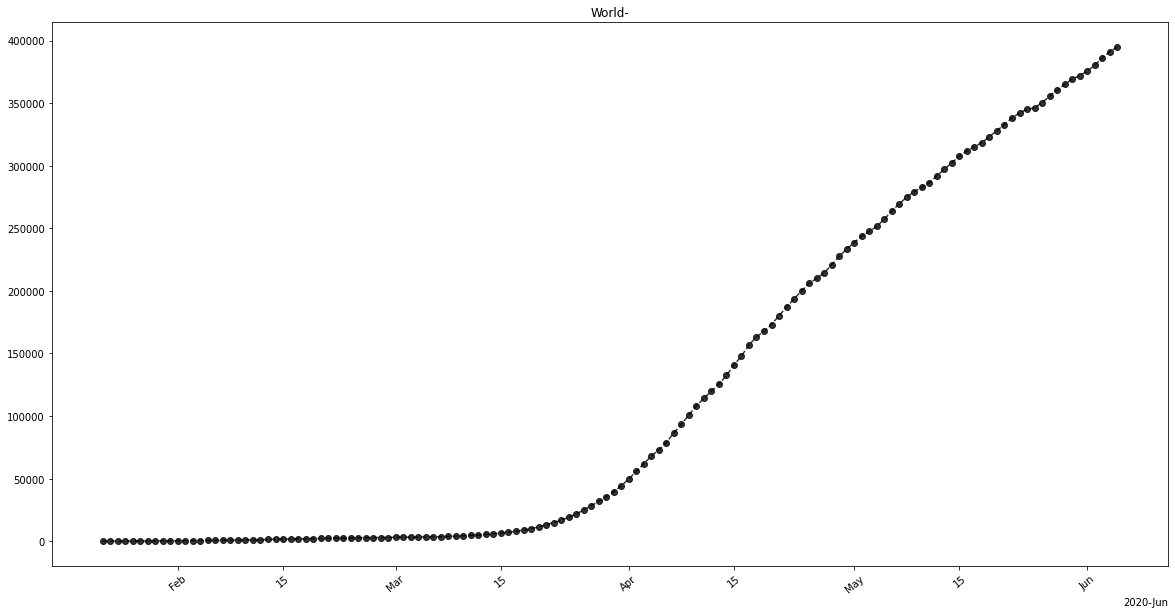

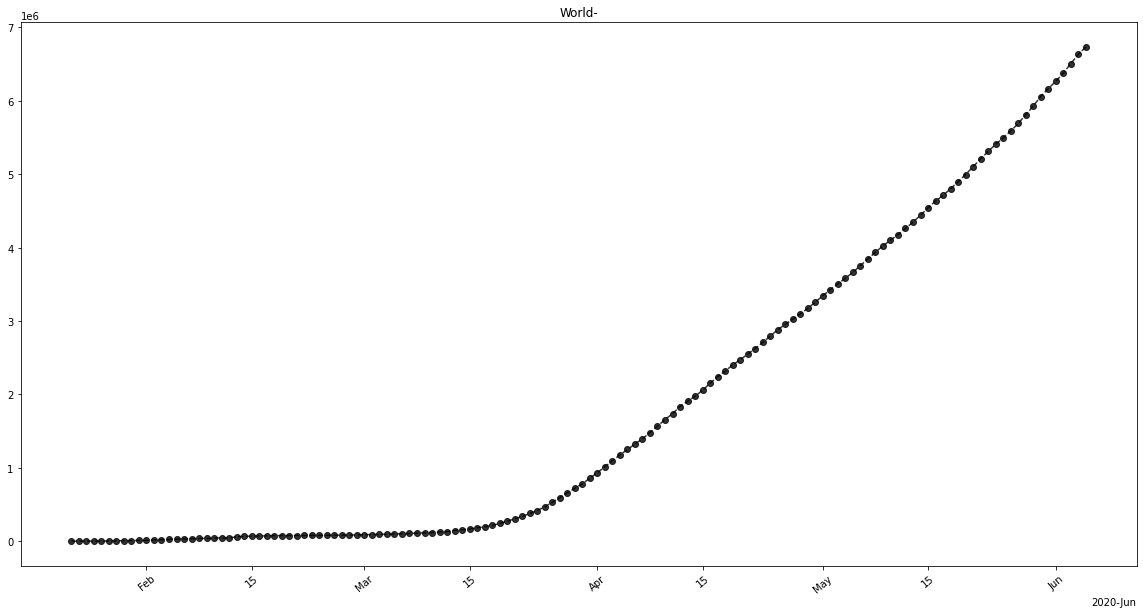

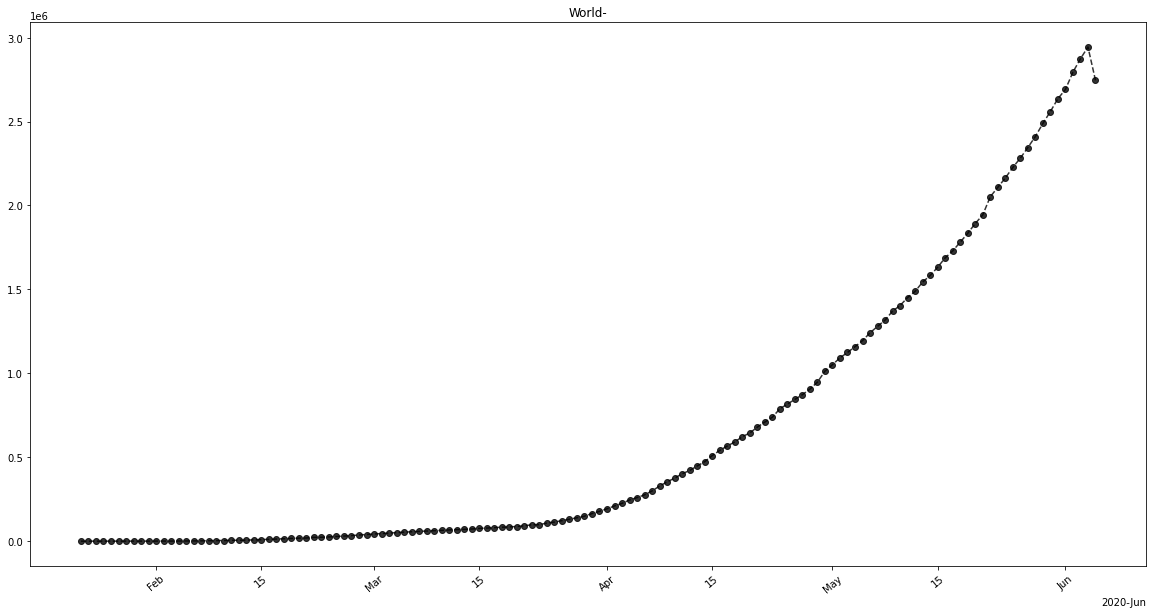

In [32]:
plotCountry('World','deaths')
plotCountry('World','confirmed')
plotCountry('World','recovered')

country not found ('Germany1', '')


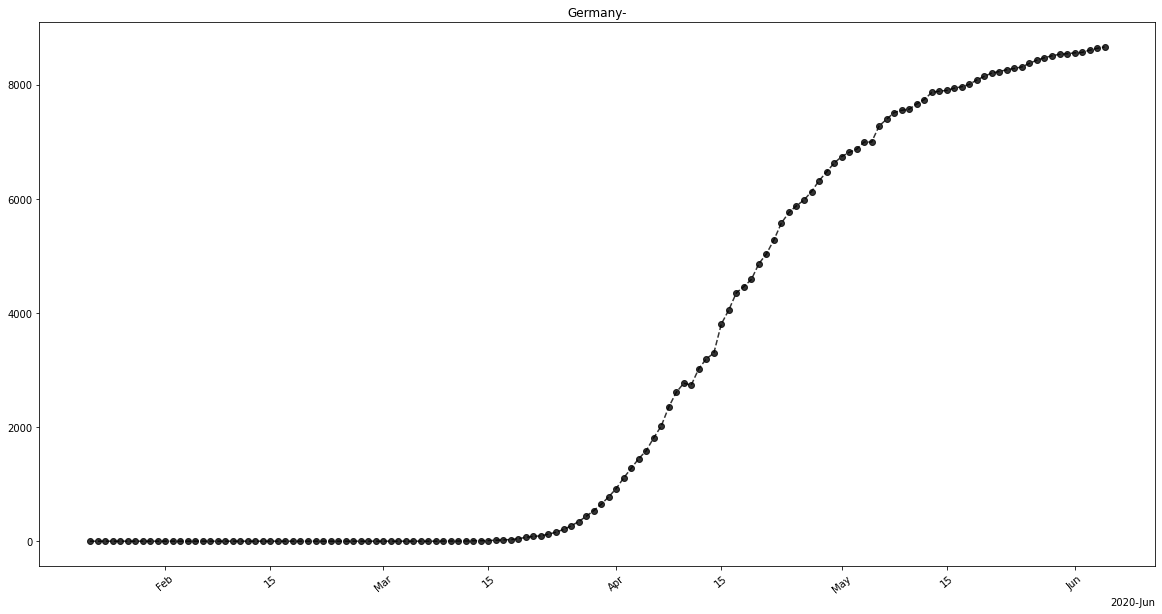

In [33]:
plotCountry(['Germany','Germany1'],'deaths')

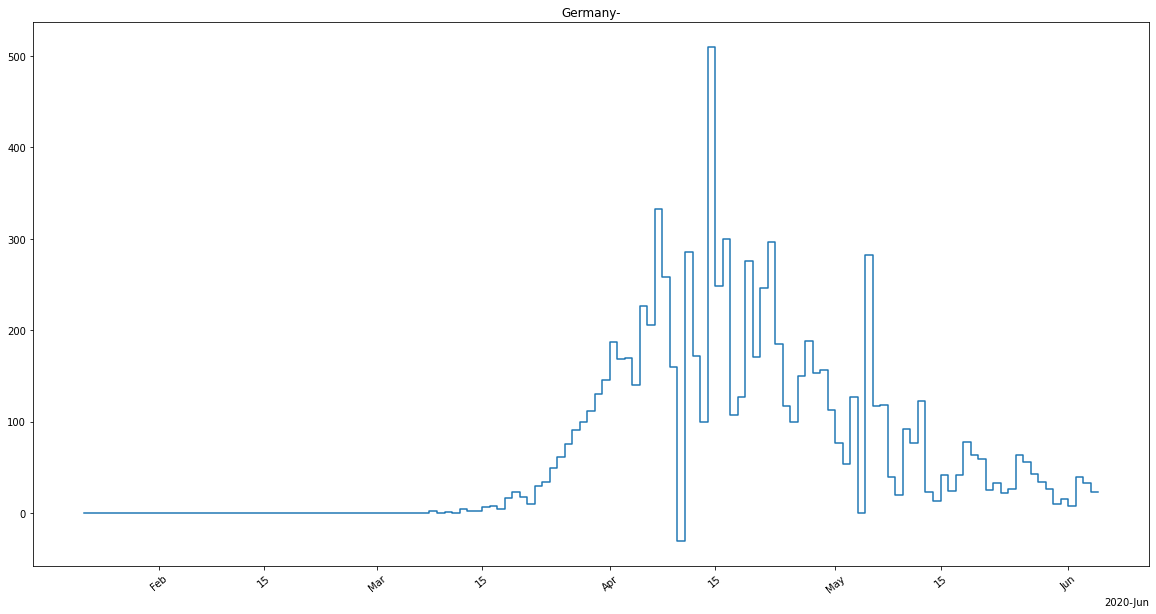

In [34]:
plotCountry(('Germany',''),'deaths','daily',step='step')

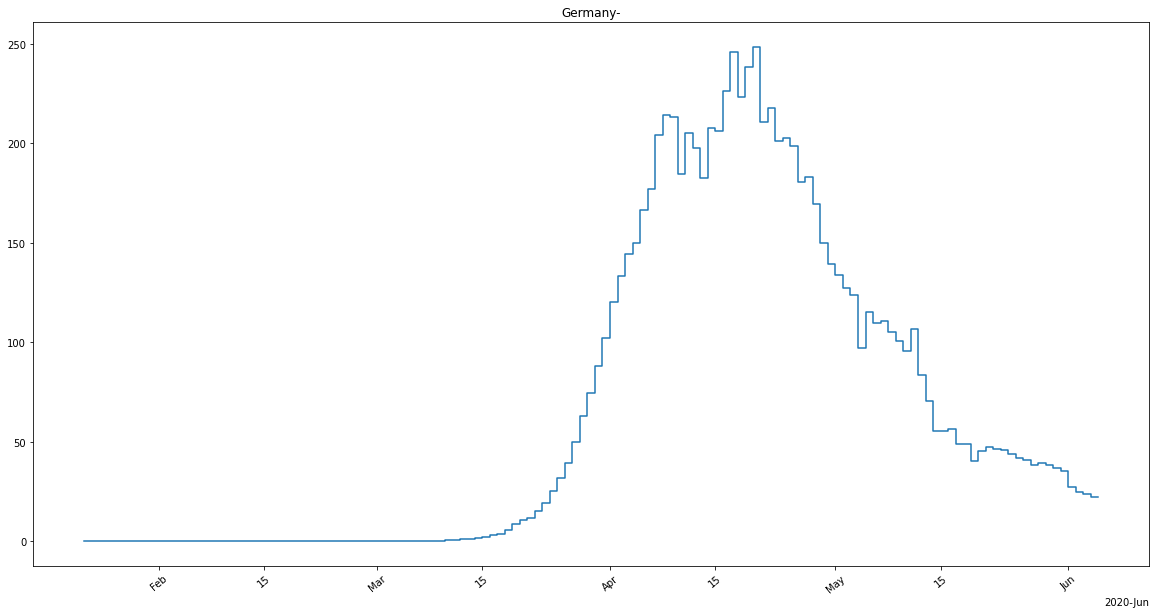

In [35]:
plotCountry(('Germany',''),'deaths','daily_av_weekly',step='step')

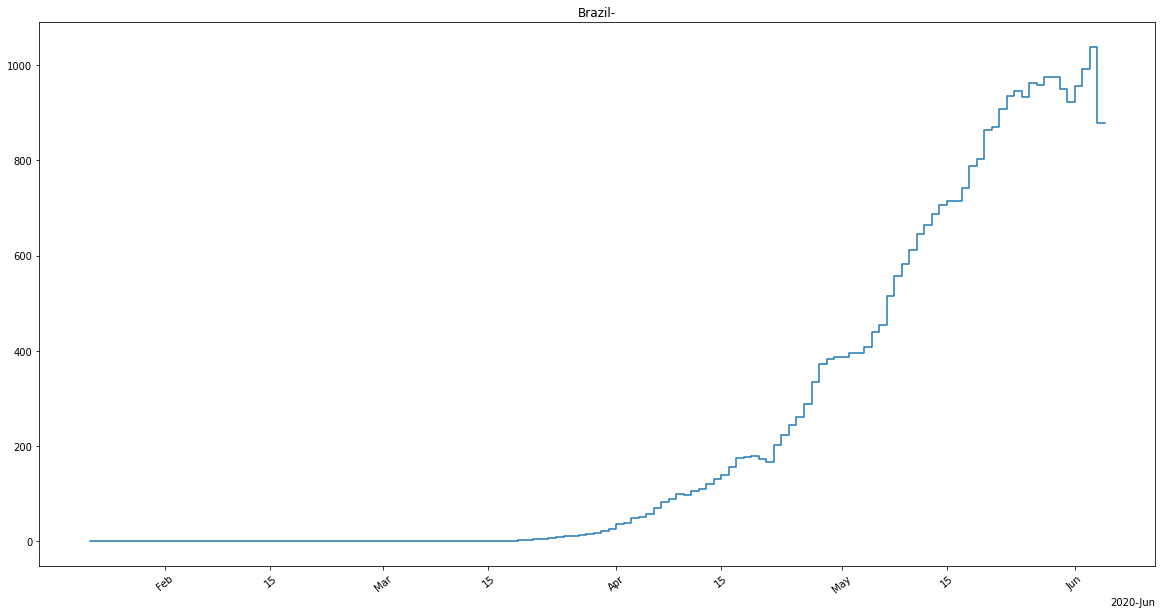

In [36]:
plotCountry('Brazil','deaths','daily_av_weekly',step='step')

number of countries 274


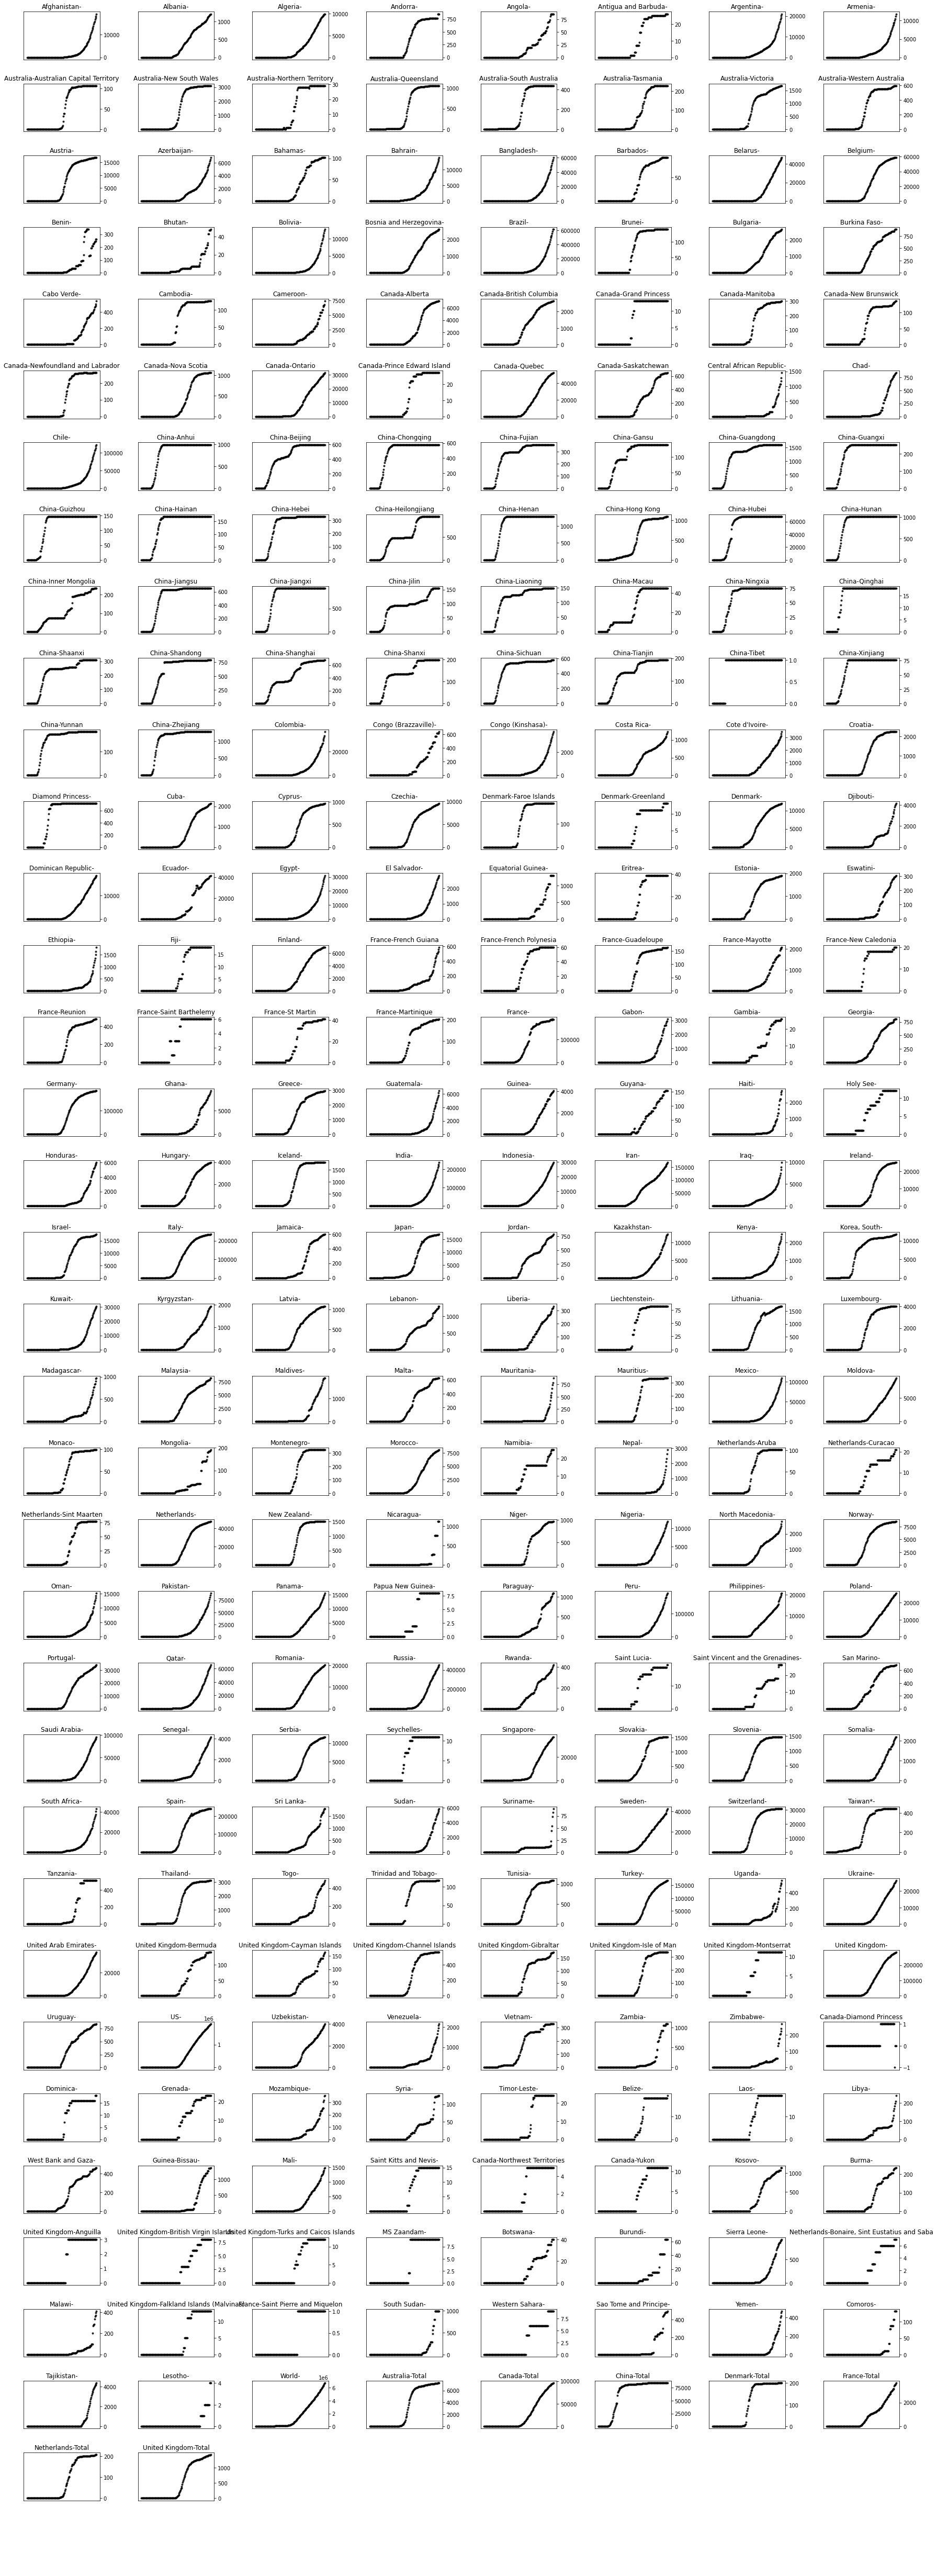

In [37]:
print("number of countries",len(countries_jhu))
max_rows=36
max_cols=8
fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(30,90))
for idx, country  in enumerate(countries_jhu):
    row = idx // max_cols
    col = idx % max_cols
    axes[row, col].axis("off")
    plotCountry(country, datatype='confirmed', fittype=None,ax=axes[row, col],ax2=True,symbol='.',
                   firstdate='01/01/20',lastdate='06/5/20')
for idx in range(len(countries_jhu),max_rows*max_cols):
    row = idx // max_cols
    col = idx % max_cols
    axes[row, col].axis("off")
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

number of countries 274


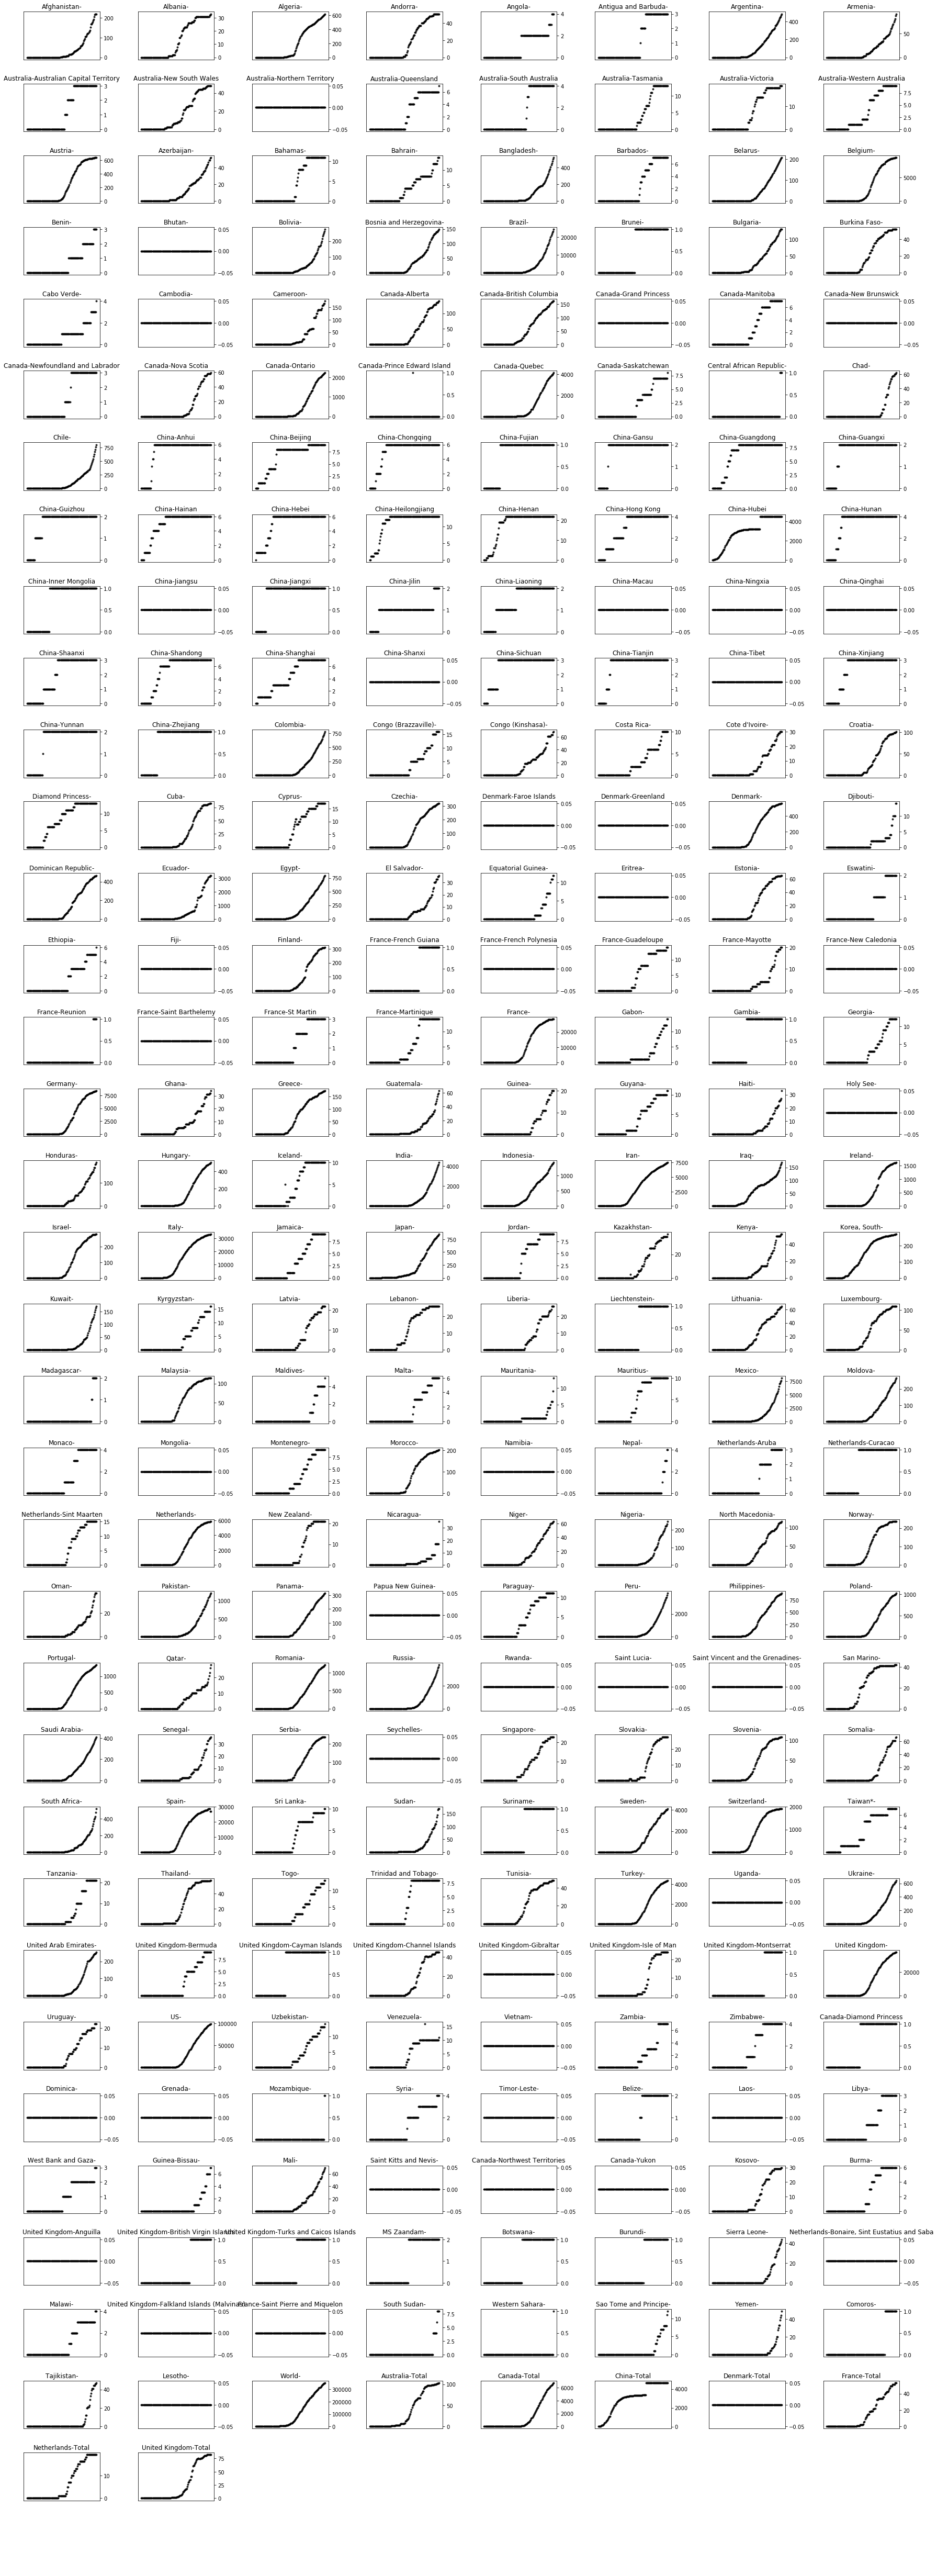

In [23]:
print("number of countries",len(countries_jhu))
max_rows=36
max_cols=8
fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(30,90))
for idx, country  in enumerate(countries_jhu):
    row = idx // max_cols
    col = idx % max_cols
    axes[row, col].axis("off")
    plotCountry(country, datatype='deaths', fittype=None,ax=axes[row, col],ax2=True,symbol='.')
for idx in range(len(countries_jhu),max_rows*max_cols):
    row = idx // max_cols
    col = idx % max_cols
    axes[row, col].axis("off")
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

number of countries 274


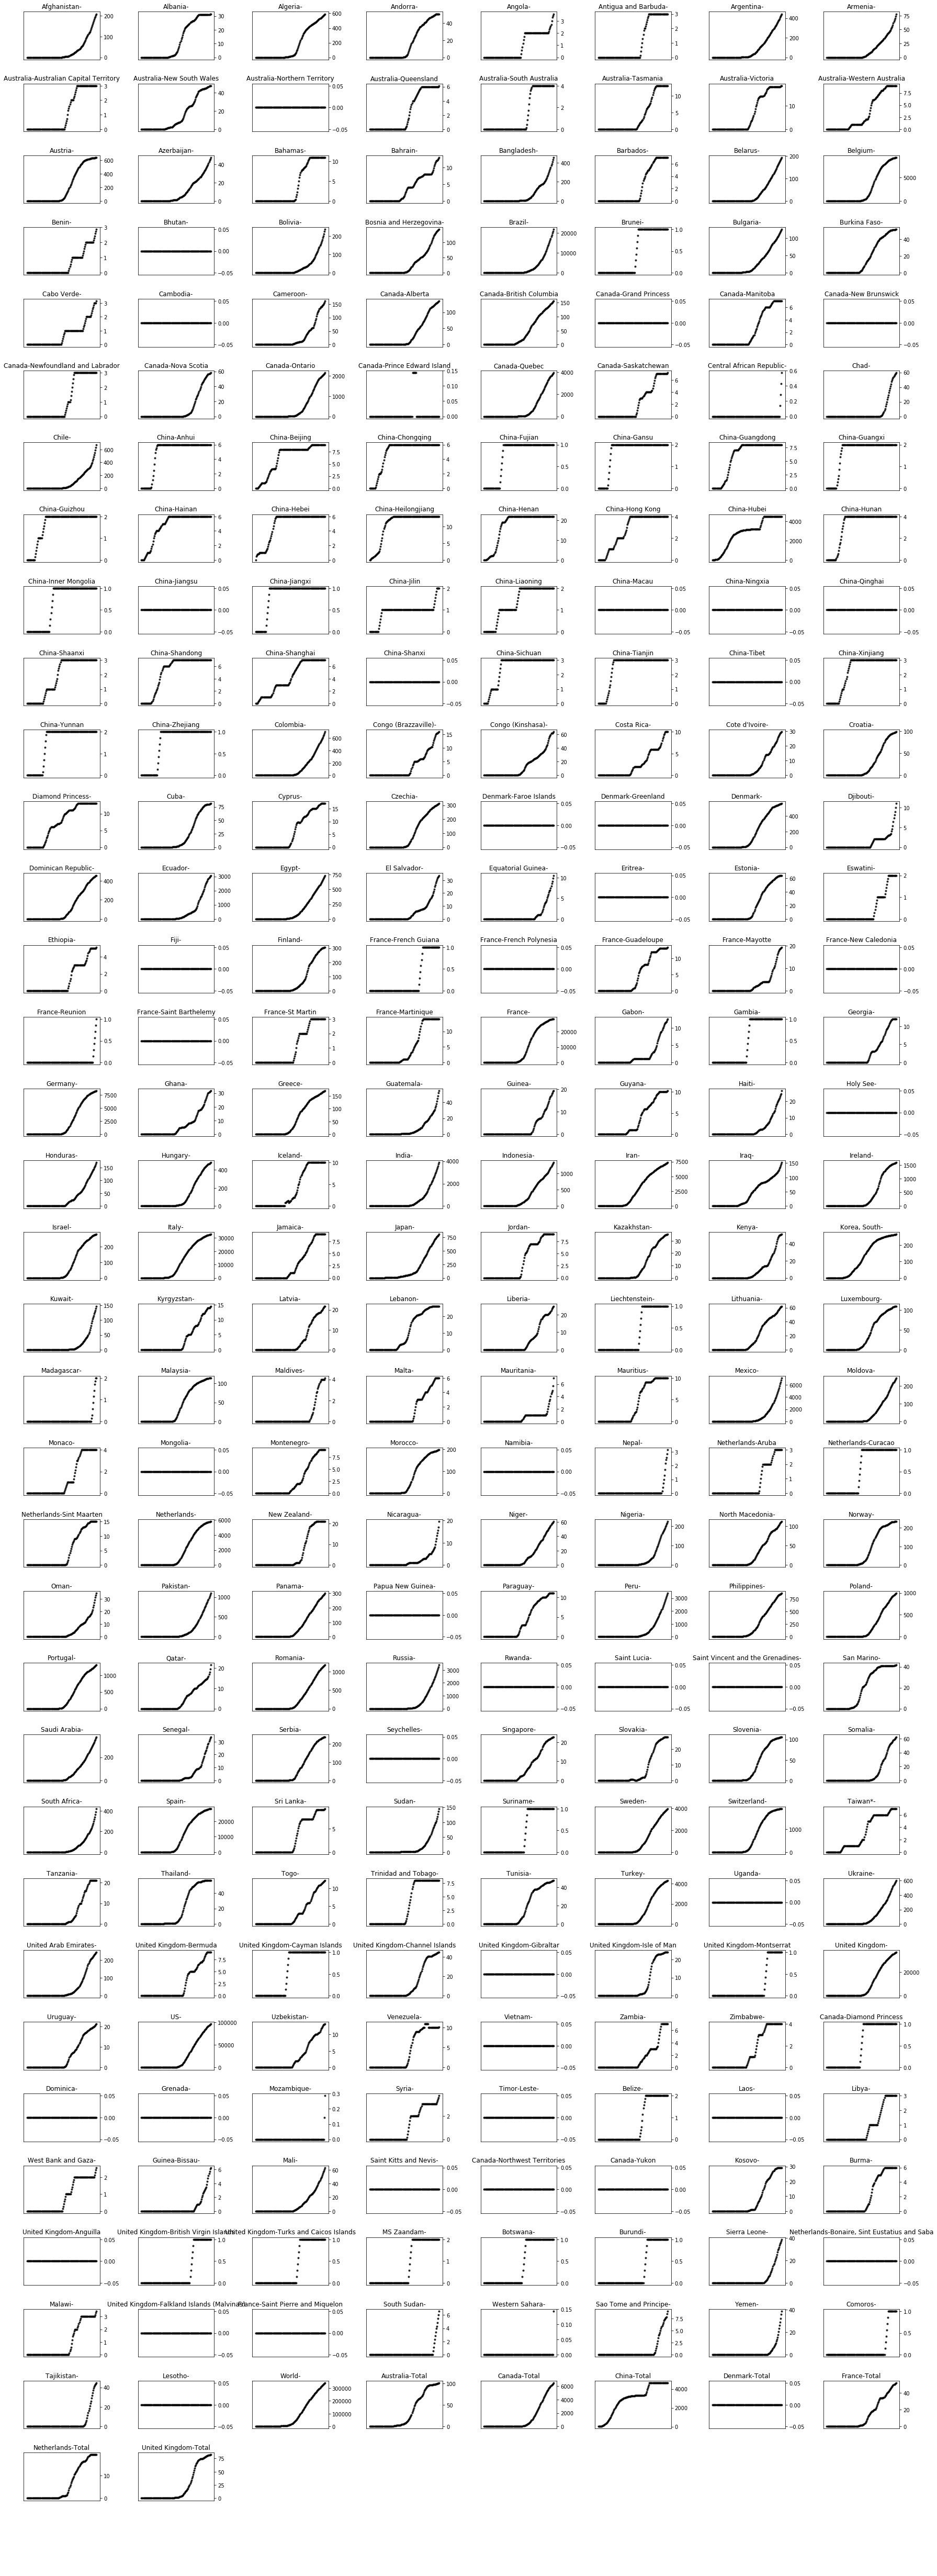

In [24]:
print("number of countries",len(countries_jhu))
max_rows=36
max_cols=8
fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(30,90))
for idx, country  in enumerate(countries_jhu):
    row = idx // max_cols
    col = idx % max_cols
    axes[row, col].axis("off")
    plotCountry(country, datatype='deaths', dataaccum='cum_av_weekly',fittype=None,ax=axes[row, col],ax2=True,symbol='.')
for idx in range(len(countries_jhu),max_rows*max_cols):
    row = idx // max_cols
    col = idx % max_cols
    axes[row, col].axis("off")
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

In [ ]:
print("number of countries",len(countries_jhu))
max_rows=36
max_cols=8
fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(30,90))
for idx, country  in enumerate(countries_jhu):
    row = idx // max_cols
    col = idx % max_cols
    axes[row, col].axis("off")
    plotCountry(country, datatype='deaths', dataaccum='daily',fittype=None,ax=axes[row, col],ax2=True,symbol='.')
for idx in range(len(countries_jhu),max_rows*max_cols):
    row = idx // max_cols
    col = idx % max_cols
    axes[row, col].axis("off")
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

In [ ]:
print("number of countries",len(countries_jhu))
max_rows=36
max_cols=8
fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(30,90))
for idx, country  in enumerate(countries_jhu):
    row = idx // max_cols
    col = idx % max_cols
    axes[row, col].axis("off")
    plotCountry(country, datatype='deaths', dataaccum='daily_av_weekly',fittype=None,ax=axes[row, col],ax2=True,symbol='.')
for idx in range(len(countries_jhu),max_rows*max_cols):
    row = idx // max_cols
    col = idx % max_cols
    axes[row, col].axis("off")
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

### Check daily figures with owid data

In [25]:
def plotDaily(country_s, datatype):
    countries = []
    if isinstance(country_s,list):
        for country in country_s:
            if isinstance(country,str):
                country = (country,'')
            countries.append(country)
    elif isinstance(country_s,str):
        countries = [(country_s,'')]
    else:
        countries = [country_s]
            
    popkeyed = covid_ts[datatype]
    dates = popkeyed['dates']
    fmt = '%m/%d/%y'
    xx = [datetime.datetime.strptime(dd,fmt) for dd in dates ]
    day0 = datetime.datetime.strptime(dates[0],fmt)
    xxi = [Float((datetime.datetime.strptime(dd,fmt)-day0).days) for dd in dates ]
    # print(xxi)
    # locator = mdates.MonthLocator()
    locator = mdates.AutoDateLocator(minticks=5, maxticks=13)
    formatter= mdates.ConciseDateFormatter(locator)
    
    fig,ax = plt.subplots(1,1,figsize=(20,10))      
    colors =  ['k', 'b', 'c', 'm', 'y', 'g', 'r']
    i = 0
    for country in countries:
            yy = popkeyed[country]
            yyf = [Float(y) for y in yy]
            yyd = [0.]*len(yyf)
            yyd[0] = 0.
            for j in range(1,len(yyf)):
                yyd[j] = yyf[j]-yyf[j-1]
            ax.step(xx,yyd,label = country[0])
            # ax.plot(xx, yyd, color = colors[i], alpha=1, label = country[0])

            i = i+1

    #ax.plot(xx, yy, 'o--', color='black', alpha=0.3)
    
    
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_locator(locator)
    for tick in ax.get_xticklabels():
        tick.set_rotation(40)
    if len(countries) == 1:
        plt.title(country[0]+'-'+country[1]+' '+datatype)
    else:
        plt.legend(loc="upper left")
        plt.title('countries '+datatype)

In [ ]:
plotDaily(['Italy','Turkey','Germany','Russia','Brazil','United Kingdom','Spain'],'deaths')

In [ ]:
plotDaily(['Germany'],'deaths')

## OWID data

In [39]:
owid_file = '../covid-19-owid/public/data/owid-covid-data.csv'
dat = []
with open(owid_file,'r',newline='') as fp:
    myreader = csv.DictReader(fp,delimiter=',')
#    rows = list(itertools.islice(myreader,4))
    for row in myreader:
        dat.append(row)

In [40]:
dat[0].keys()

odict_keys(['iso_code', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cvd_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k'])

In [ ]:
set([(d['iso_code'],d['location']) for d in dat])

In [ ]:
countries = list(set([dd['iso_code'] for dd in dat]))

In [ ]:
deathUSA = [(dd['date'],dd['new_deaths']) for dd in dat if dd['iso_code']=='USA']

fmt = '%Y-%m-%d'
xx = [datetime.datetime.strptime(dd[0],fmt) for dd in deathUSA if int(dd[1])>0 ]
yy = [int(dd[1]) for dd in deathUSA if int(dd[1])>0 ]

locator = mdates.MonthLocator()
formatter= mdates.ConciseDateFormatter(locator)

fig,ax = plt.subplots(1,1)
ax.step(xx,yy)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)
for tick in ax.get_xticklabels():
    tick.set_rotation(40)
plt.title('USA new deaths')
plt.show()

In [ ]:
def plotTarget(iso,targ='new_deaths'):
    datt = [(dd['date'],dd[targ]) for dd in dat if dd['iso_code']==iso]
    deathstr = 'death'+iso
    fmt = '%Y-%m-%d'
    
    start=False
    xx = [] ; yy = []
    for i in range(len(datt)):
        dd = datt[i]
        if float(dd[1]) == 0:
            if start==False:
                continue
            else:
                pass
        else:
            if start==False:
                start=True
        if start:
            xx.append(datetime.datetime.strptime(dd[0],fmt))
            yy.append(float(dd[1]))
        
#    xx = [datetime.datetime.strptime(dd[0],fmt) for dd in datt if float(dd[1])>0 ]
#    yy = [float(dd[1]) for dd in datt if int(dd[1])>0 ]

    locator = mdates.MonthLocator()
    formatter= mdates.ConciseDateFormatter(locator)

    register_matplotlib_converters() # pandas made me do it
    fig,ax = plt.subplots(1,1,figsize=(20,10))
    ax.step(xx,yy)
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_locator(locator)
    for tick in ax.get_xticklabels():
        tick.set_rotation(40)
        plt.title(iso+' '+targ)
    plt.show()

In [ ]:
plotTarget('DEU')

In [ ]:
plotTarget('DEU','new_cases')

In [ ]:
plotTarget('USA','new_cases')

In [ ]:
plotTarget('FRA','new_cases')

In [ ]:
plotTarget('SWE','new_cases')

In [ ]:
plotTarget('SWE','new_deaths')

In [ ]:
plotTarget('BRA','new_deaths')

## Oxford data

In [24]:
owid_file = '../covid-policy-tracker/data/OxCGRT_latest.csv'
oxdat = []
with open(owid_file,'r',newline='') as fp:
    myreader = csv.DictReader(fp,delimiter=',')
#    rows = list(itertools.islice(myreader,4))
    for row in myreader:
        oxdat.append(row)
    

In [25]:
oxdat[0].keys()

odict_keys(['CountryName', 'CountryCode', 'Date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag', 'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport', 'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag', 'C7_Restrictions on internal movement', 'C7_Flag', 'C8_International travel controls', 'E1_Income support', 'E1_Flag', 'E2_Debt/contract relief', 'E3_Fiscal measures', 'E4_International support', 'H1_Public information campaigns', 'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing', 'H4_Emergency investment in healthcare', 'H5_Investment in vaccines', 'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex', 'StringencyIndexForDisplay', 'StringencyLegacyIndex', 'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex', 'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex', 'ContainmentHealthIndexForDisplay', 'EconomicSupportIndex', 'EconomicSupportIndexForDisplay'])

In [26]:
countries = list(set([(dd['CountryName'],dd['CountryCode']) for dd in oxdat]))

In [27]:
[countries[i] for i in range(10)]

[('Philippines', 'PHL'),
 ('Andorra', 'AND'),
 ('Bangladesh', 'BGD'),
 ('Mauritania', 'MRT'),
 ('Iraq', 'IRQ'),
 ('United Kingdom', 'GBR'),
 ('China', 'CHN'),
 ('Lesotho', 'LSO'),
 ('Tanzania', 'TZA'),
 ('Malaysia', 'MYS')]

In [ ]:
dates = np.sort(list([dd['Date'] for dd in oxdat]))
dates_uniq = np.unique(dates)
dates_uniq

In [ ]:
foo = [(dd['Date'],dd['C1_School closing'],dd['C1_Flag']) for dd in oxdat if dd['CountryCode']=='USA']

In [ ]:
xx = foo[0:10]
print(xx)
xx=foo[-10:]
print(xx)

In [ ]:
foo = [(dd['Date'],dd['C1_School closing'],dd['C1_Flag']) 
       for dd in oxdat if dd['CountryCode']=='USA']

fmt = '%Y%m%d'
first = 31+22-1
xx = [datetime.datetime.strptime(dd[0],fmt) for dd in foo][first:]
yy = []
for dd in foo[first:]:
    try:
        yy.append(float(dd[1]))
    except:
        yy.append(float('NaN'))


locator = mdates.MonthLocator()
formatter= mdates.ConciseDateFormatter(locator)

fig,ax = plt.subplots(1,1)
ax.step(xx,yy)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)
for tick in ax.get_xticklabels():
    tick.set_rotation(40)
plt.title('USA')
plt.show()

Note:  no wildcard data:

In [ ]:
foo = [(dd['Date'],dd['CountryCode'],dd['M1_Wildcard']) 
       for dd in oxdat if dd['M1_Wildcard'] != '']



In [ ]:
foo


Notes:  
* first version of `datcodes` leaves out all flags (general vs. targeted implementation)
* 2nd version leaves out all variables measured in dollars

In [28]:
datcodes = ['C1_School closing', 'C2_Workplace closing', 
            'C3_Cancel public events', 'C4_Restrictions on gatherings', 
            'C5_Close public transport', 'C6_Stay at home requirements', 
            'C7_Restrictions on internal movement', 'C8_International travel controls', 
            'E1_Income support', 'E2_Debt/contract relief', 'E3_Fiscal measures', 
            'E4_International support', 'H1_Public information campaigns', 
            'H2_Testing policy', 'H3_Contact tracing', 
            'H4_Emergency investment in healthcare', 'H5_Investment in vaccines']

datcodes = ['C1_School closing', 'C2_Workplace closing', 
            'C3_Cancel public events', 'C4_Restrictions on gatherings', 
            'C5_Close public transport', 'C6_Stay at home requirements', 
            'C7_Restrictions on internal movement', 'C8_International travel controls', 
            'E1_Income support', 'E2_Debt/contract relief', 
            'H1_Public information campaigns', 
            'H2_Testing policy', 'H3_Contact tracing']



In [42]:
countrycodes = list(set([dd['CountryCode'] for dd in oxdat if Float(dd['ConfirmedCases'])>10000]))
len(countrycodes)

49

In [31]:
def Float(x):
    try:
        rtn = float(x)
    except:
        rtn = float('NaN')
    return rtn


In [32]:
def get_codedat(countrycode='USA'):
    codedat = []
    foo = [[dd['Date']]+ [Float(dd[c]) for c in datcodes]
           for dd in oxdat if dd['CountryCode']==countrycode]
    return foo
    


In [ ]:
get_codedat()

### Response policy maps

* time along x axis 
* NaN same color as max value (typically 4)
* 12 rows for presence of 12 factors.  cf oxford codebook.md in ../covid-policy-tracker/documentation/.

In [ ]:
# for comaptibility with JHU data set first elt as 22nd Feb 2020
# assuming Oxford records start with Jan 1st 2020
first = 31+22-1

Text(0.5, 1.0, 'DEU')

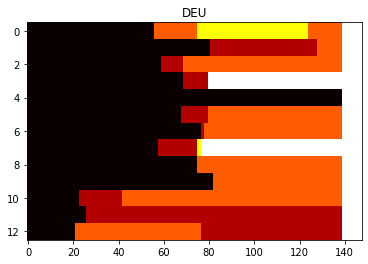

In [33]:
foo = get_codedat('DEU')
foo = [f[1:] for f in foo]
plt.imshow(np.transpose(foo),cmap='hot',aspect='auto');
plt.title('DEU')


In [ ]:
foo = get_codedat('USA')[first:]
foo = [f[1:] for f in foo]
plt.imshow(np.transpose(foo),cmap='hot',aspect='auto');
plt.title("USA")

In [ ]:
foo = get_codedat('KOR')
foo = [f[1:] for f in foo]
plt.imshow(np.transpose(foo),cmap='hot',aspect='auto');

In [ ]:
foo = get_codedat('SWE')
foo = [f[1:] for f in foo]
plt.imshow(np.transpose(foo),cmap='hot',aspect='auto');

In [ ]:
print("number of countries",len(countrycodes))
max_rows=22
max_cols=8
fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,40))
for idx, countrycode  in enumerate(countrycodes):
    foo = get_codedat(countrycode)
    foo = [f[1:] for f in foo]
    row = idx // max_cols
    col = idx % max_cols
    axes[row, col].axis("off")
    axes[row, col].imshow(np.transpose(foo),cmap='hot',aspect='auto',interpolation='none');
for idx in range(len(countrycodes),max_rows*max_cols):
    row = idx // max_cols
    col = idx % max_cols
    axes[row, col].axis("off")
plt.subplots_adjust(wspace=.05, hspace=.05)
plt.show()

In [ ]:
print(countrycodes)
#e.g.
countrycode = 'BOL'
foo = get_codedat(countrycode)
foo = [f[1:] for f in foo]
countrynames = [dd['CountryName'] for dd in oxdat if dd['CountryCode']==countrycode]
countryname = countrynames[0]
print(countryname)

In [ ]:
# aim here is to format x axis of imshow array as dates
# for working implementation see https://stackoverflow.com/questions/52574000/plotting-an-image-with-x-axis-as-time
# this commented out code does not work here
foo = get_codedat('FRA')
fmt = '%Y%m%d'

locator = mdates.MonthLocator()    # need to change locator to convert integers to dates first
formatter= mdates.ConciseDateFormatter(locator)
xx =[datetime.datetime.strptime(dd[0],fmt) for dd in foo]
# print(xx)
foo = [f[1:] for f in foo]
register_matplotlib_converters() # pandas made me do it
fig,ax = plt.subplots(1,1,figsize=(10,10))
# ax.xaxis_date()           # treats x axis as dates if start/finish date set appropriately
# plt.xlim(xx[0],xx[-1])   # this version produces right date axis but no data shown
# plt.xlim(0,(xx[-1]-xx[0]).days)  # this version keeps xaxis as integer -> errors
ax.imshow(np.transpose(foo),cmap='hot',aspect='auto')  # 
# ax.xaxis.set_major_formatter(formatter)
# ax.xaxis.set_major_locator(locator)
# for tick in ax.get_xticklabels():
#     tick.set_rotation(40)

plt.show()

## Combinations of data : Oxford policy plus JHU or OWID

In [34]:
# translations from Oxford data base countries to JHU names
country_Oxford_JHU = {}
country_Oxford_JHU.update({('Cape Verde', ''):('Cabo Verde', '')})
country_Oxford_JHU.update({('Aruba', ''):('Netherlands', 'Aruba')})
country_Oxford_JHU.update({('Bermuda', ''):('United Kingdom', 'Bermuda')})
country_Oxford_JHU.update({('Hong Kong', ''):('China', 'Hong Kong')})
country_Oxford_JHU.update({('Czech Republic', ''):('Czechia', '')})
country_Oxford_JHU.update({('China', ''):('China', 'Total')})          # split in database : sums to Total need to be done
country_Oxford_JHU.update({('Slovak Republic', ''):('Slovakia', '')})
country_Oxford_JHU.update({('Congo', ''):('Congo (Brazzaville)', '')}) # two Congos, this is Rep. of Congo, other is Democratic Republic of Congo
country_Oxford_JHU.update({('Democratic Republic of Congo', ''):('Congo-Kinshasa','')})
country_Oxford_JHU.update({('Solomon Islands', ''):('Solomon Islands', '')}) # Not present in JHU list: sovereign state poln 650000
country_Oxford_JHU.update({('South Korea', ''):('Korea, South', '')})
country_Oxford_JHU.update({('Turkmenistan', ''):('Turkmenistan', '')}) # Not present in JHU list: 5.6M people in Central Asia
country_Oxford_JHU.update({('Myanmar', ''):('Thailand', '')})
country_Oxford_JHU.update({('United States', '') : ('US', '')})
country_Oxford_JHU.update({('Australia', ''):('Australia', 'Total')})  # split in database : sums to Total need to be done
country_Oxford_JHU.update({('Puerto Rico', ''):('United States','Puerto Rico')})   # not found in inspection of JHU list, territory of US
country_Oxford_JHU.update({('Palestine', ''):('West Bank and Gaza', '')})
country_Oxford_JHU.update({('Timor', ''):('Timor-Leste', '')})         # check two Timors, East Timor
country_Oxford_JHU.update({('Canada', ''):('Canada', 'Total')})        # split in database : sums to Total need to be done
country_Oxford_JHU.update({('Greenland', ''):('Denmark', 'Greenland')})
country_Oxford_JHU.update({('Macao', ''):('China', 'Macau')})
country_Oxford_JHU.update({('Kyrgyz Republic', ''):('Kyrgyzstan', '')})
country_Oxford_JHU.update({('Taiwan', ''):('Taiwan*', '')})
country_Oxford_JHU.update({('Guam', ''):('United States','Guam')})     # not found in inspection of JHU list, territory of US

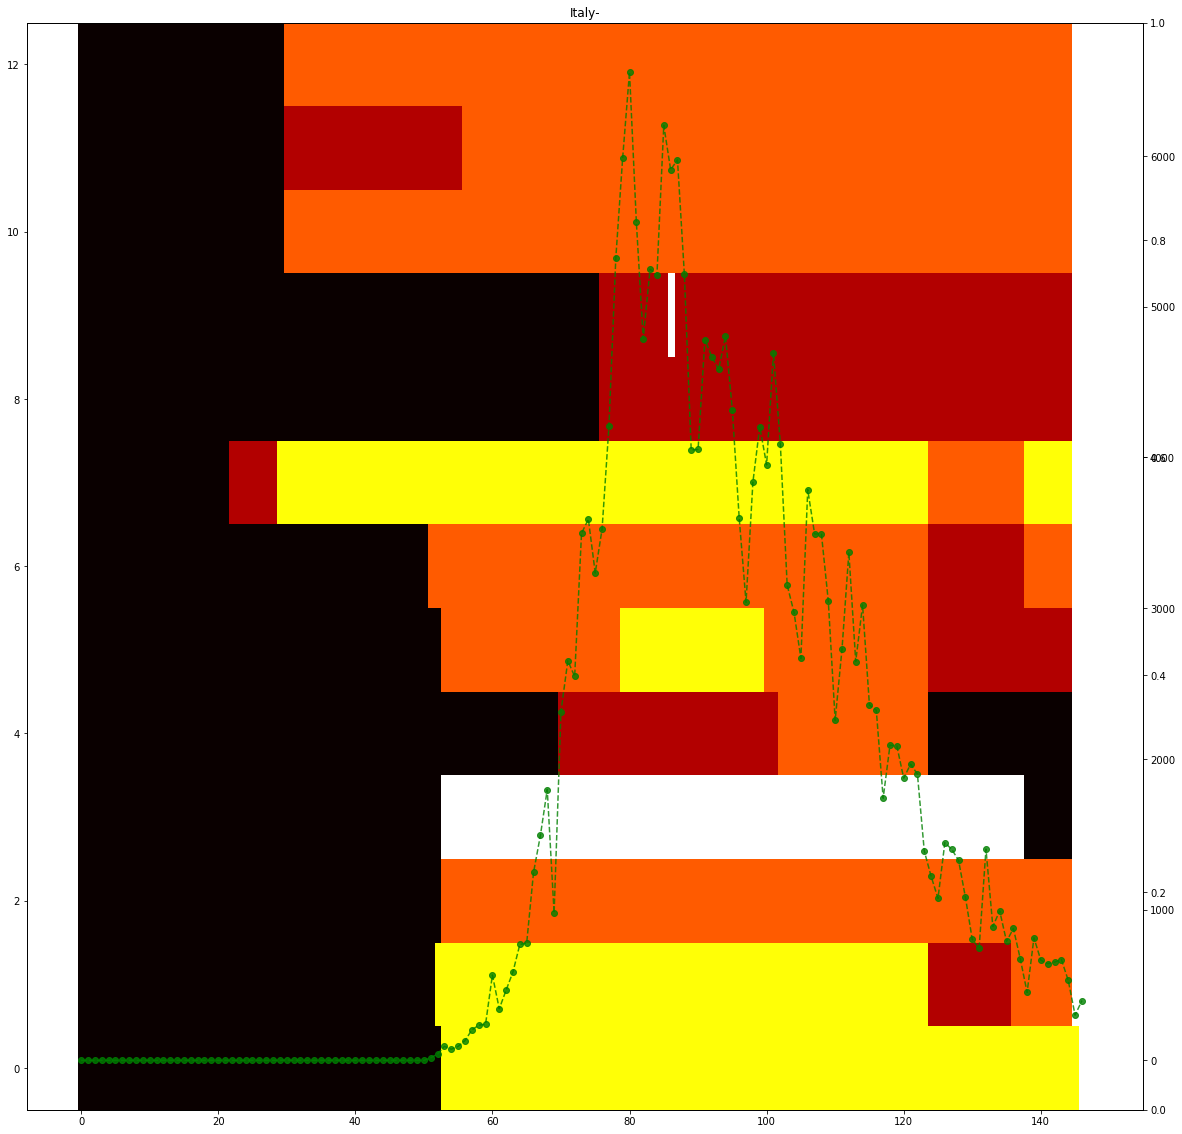

In [35]:
# print country data and corresponding JHU confirmed cases if available on same timescale
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
countrycode='ITA'
foo = get_codedat(countrycode)
pdata = np.transpose([f[1:] for f in foo])
xmin = 0
xmax = pdata[-1,0]
ymin = 0
ymax = 200000
countrynames = [dd['CountryName'] for dd in oxdat if dd['CountryCode']==countrycode]
countryname = countrynames[0]
if (countryname,'') not in countries_jhu:
    print(countryname)
    countryname = country_Oxford_JHU[(countryname,'')]
#axes.axis("off")

# axes.imshow(pdata,cmap='hot',aspect='auto',interpolation='none',origin='lower',extent=[0,xmax,0,ymax])
    # axes[row, col].pcolor(pdata,cmap='hot')
    # print(countryname)
    # xxx=range(len(pdata[0]))
# plotCountry(countryname, datatype='confirmed', dataaccum='cumulative',fittype=None,ax=axes,
#                symbol='.',firstdate='01/01/20',lastdate='05/21/20',intdates=True)
axes.imshow(pdata,cmap='hot',aspect='auto',interpolation='none',origin='lower')
axes2 = axes.twinx()
plotCountry(countryname, datatype='confirmed', dataaccum='daily', fittype=None,ax=axes, ax2=axes2,
                symbol='o--',firstdate='01/01/20',lastdate='05/21/20',intdates=True,linecolor='green')

# plt.subplots_adjust(wspace=.05, hspace=.05)
plt.show()

In [36]:
country_Oxford_JHU.update({('Democratic Republic of Congo', ''):('Congo-Kinshasa','')})

number of countries 49


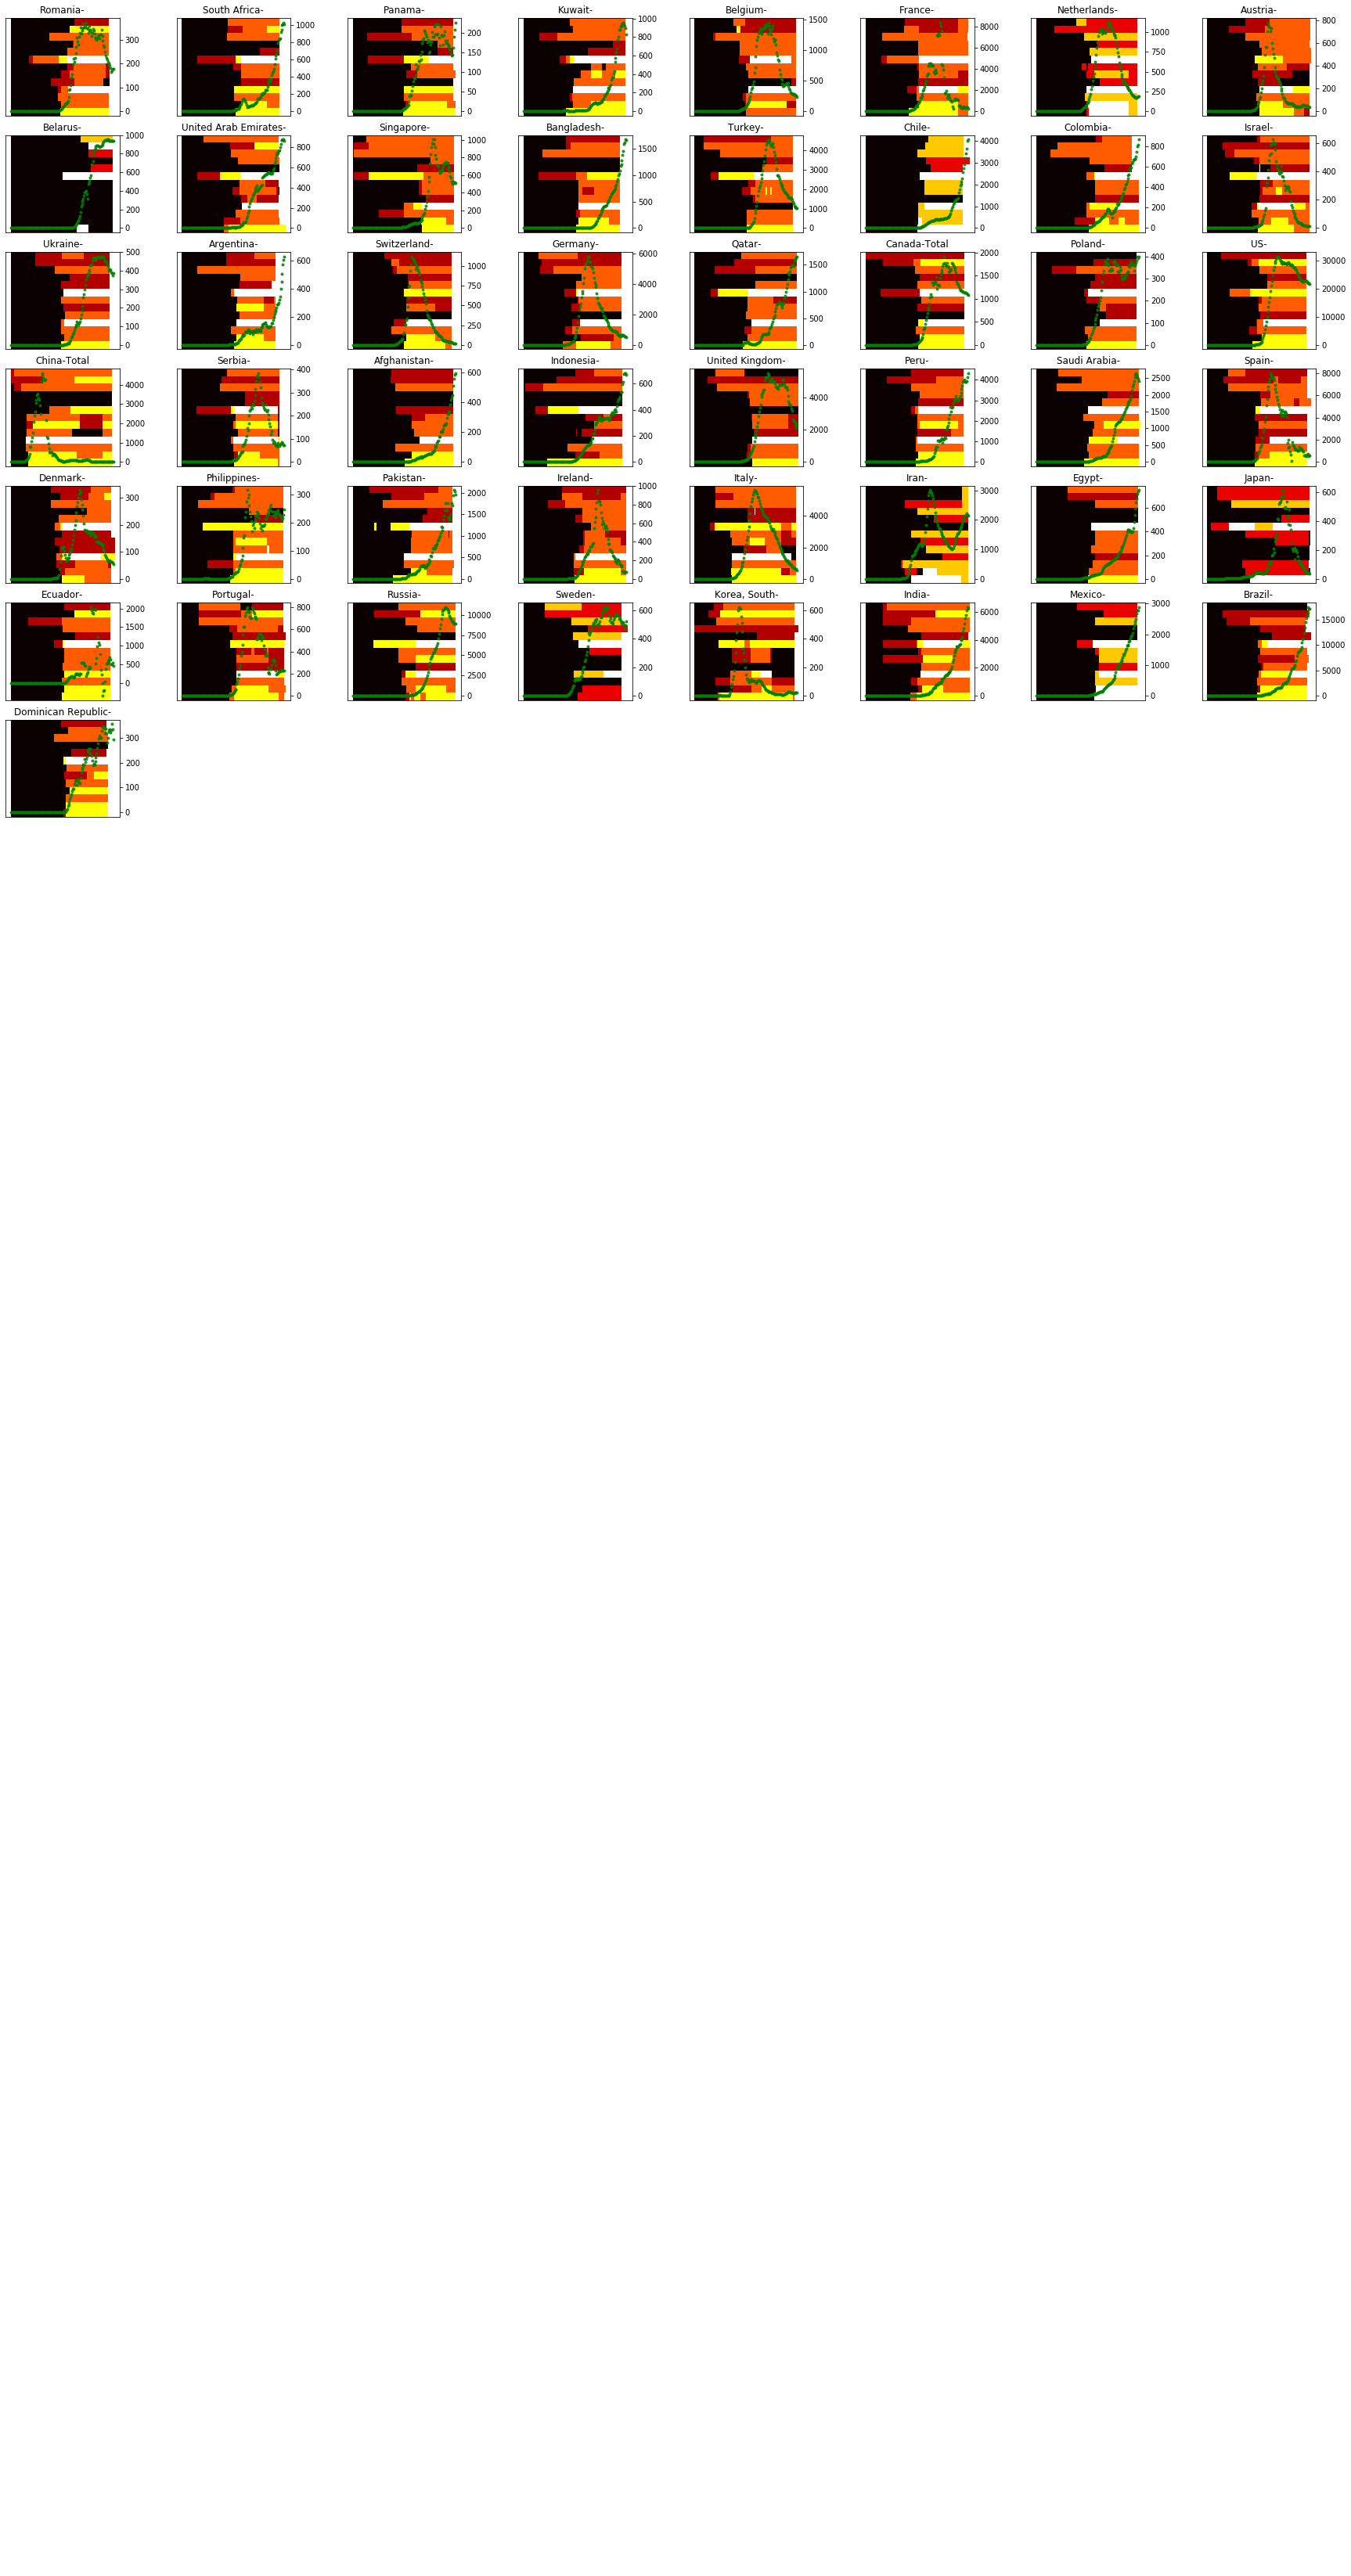

In [44]:
# print country data and corresponding JHU confirmed cases if available on same timescale
print("number of countries",len(countrycodes))
max_rows=22
max_cols=8
fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(30,60))
for idx, countrycode  in enumerate(countrycodes):
    foo = get_codedat(countrycode)
    # print(np.transpose(foo) # NB need to transpose to get dates on x axis
    foo = [f[1:] for f in foo]
    
    countrynames = [dd['CountryName'] for dd in oxdat if dd['CountryCode']==countrycode]
    countryname = countrynames[0]
    if (countryname,'') not in countries_jhu:
        # print(countryname)
        countryname = country_Oxford_JHU[(countryname,'')]
    row = idx // max_cols
    col = idx % max_cols
    axes[row, col].axis("off")
    axes[row, col].imshow(np.transpose(foo),cmap='hot',aspect='auto',interpolation='none',origin='lower')
    # axes[row, col].pcolor(np.transpose(foo),cmap='hot')
    # print(countryname)
    # xxx=range(len(np.transpose(foo)[0]))
    axes2=axes[row, col].twinx
    plotCountry(countryname, datatype='confirmed', dataaccum='daily_av_weekly',fittype=None,ax=axes[row,col],ax2=axes2,
                symbol='.',firstdate='01/01/20',lastdate='05/21/20',intdates=True,linecolor='green')

for idx in range(len(countrycodes),max_rows*max_cols):
    row = idx // max_cols
    col = idx % max_cols
    axes[row, col].axis("off")
    
plt.subplots_adjust(wspace=.5, hspace=.2)
plt.show()

number of countries 49


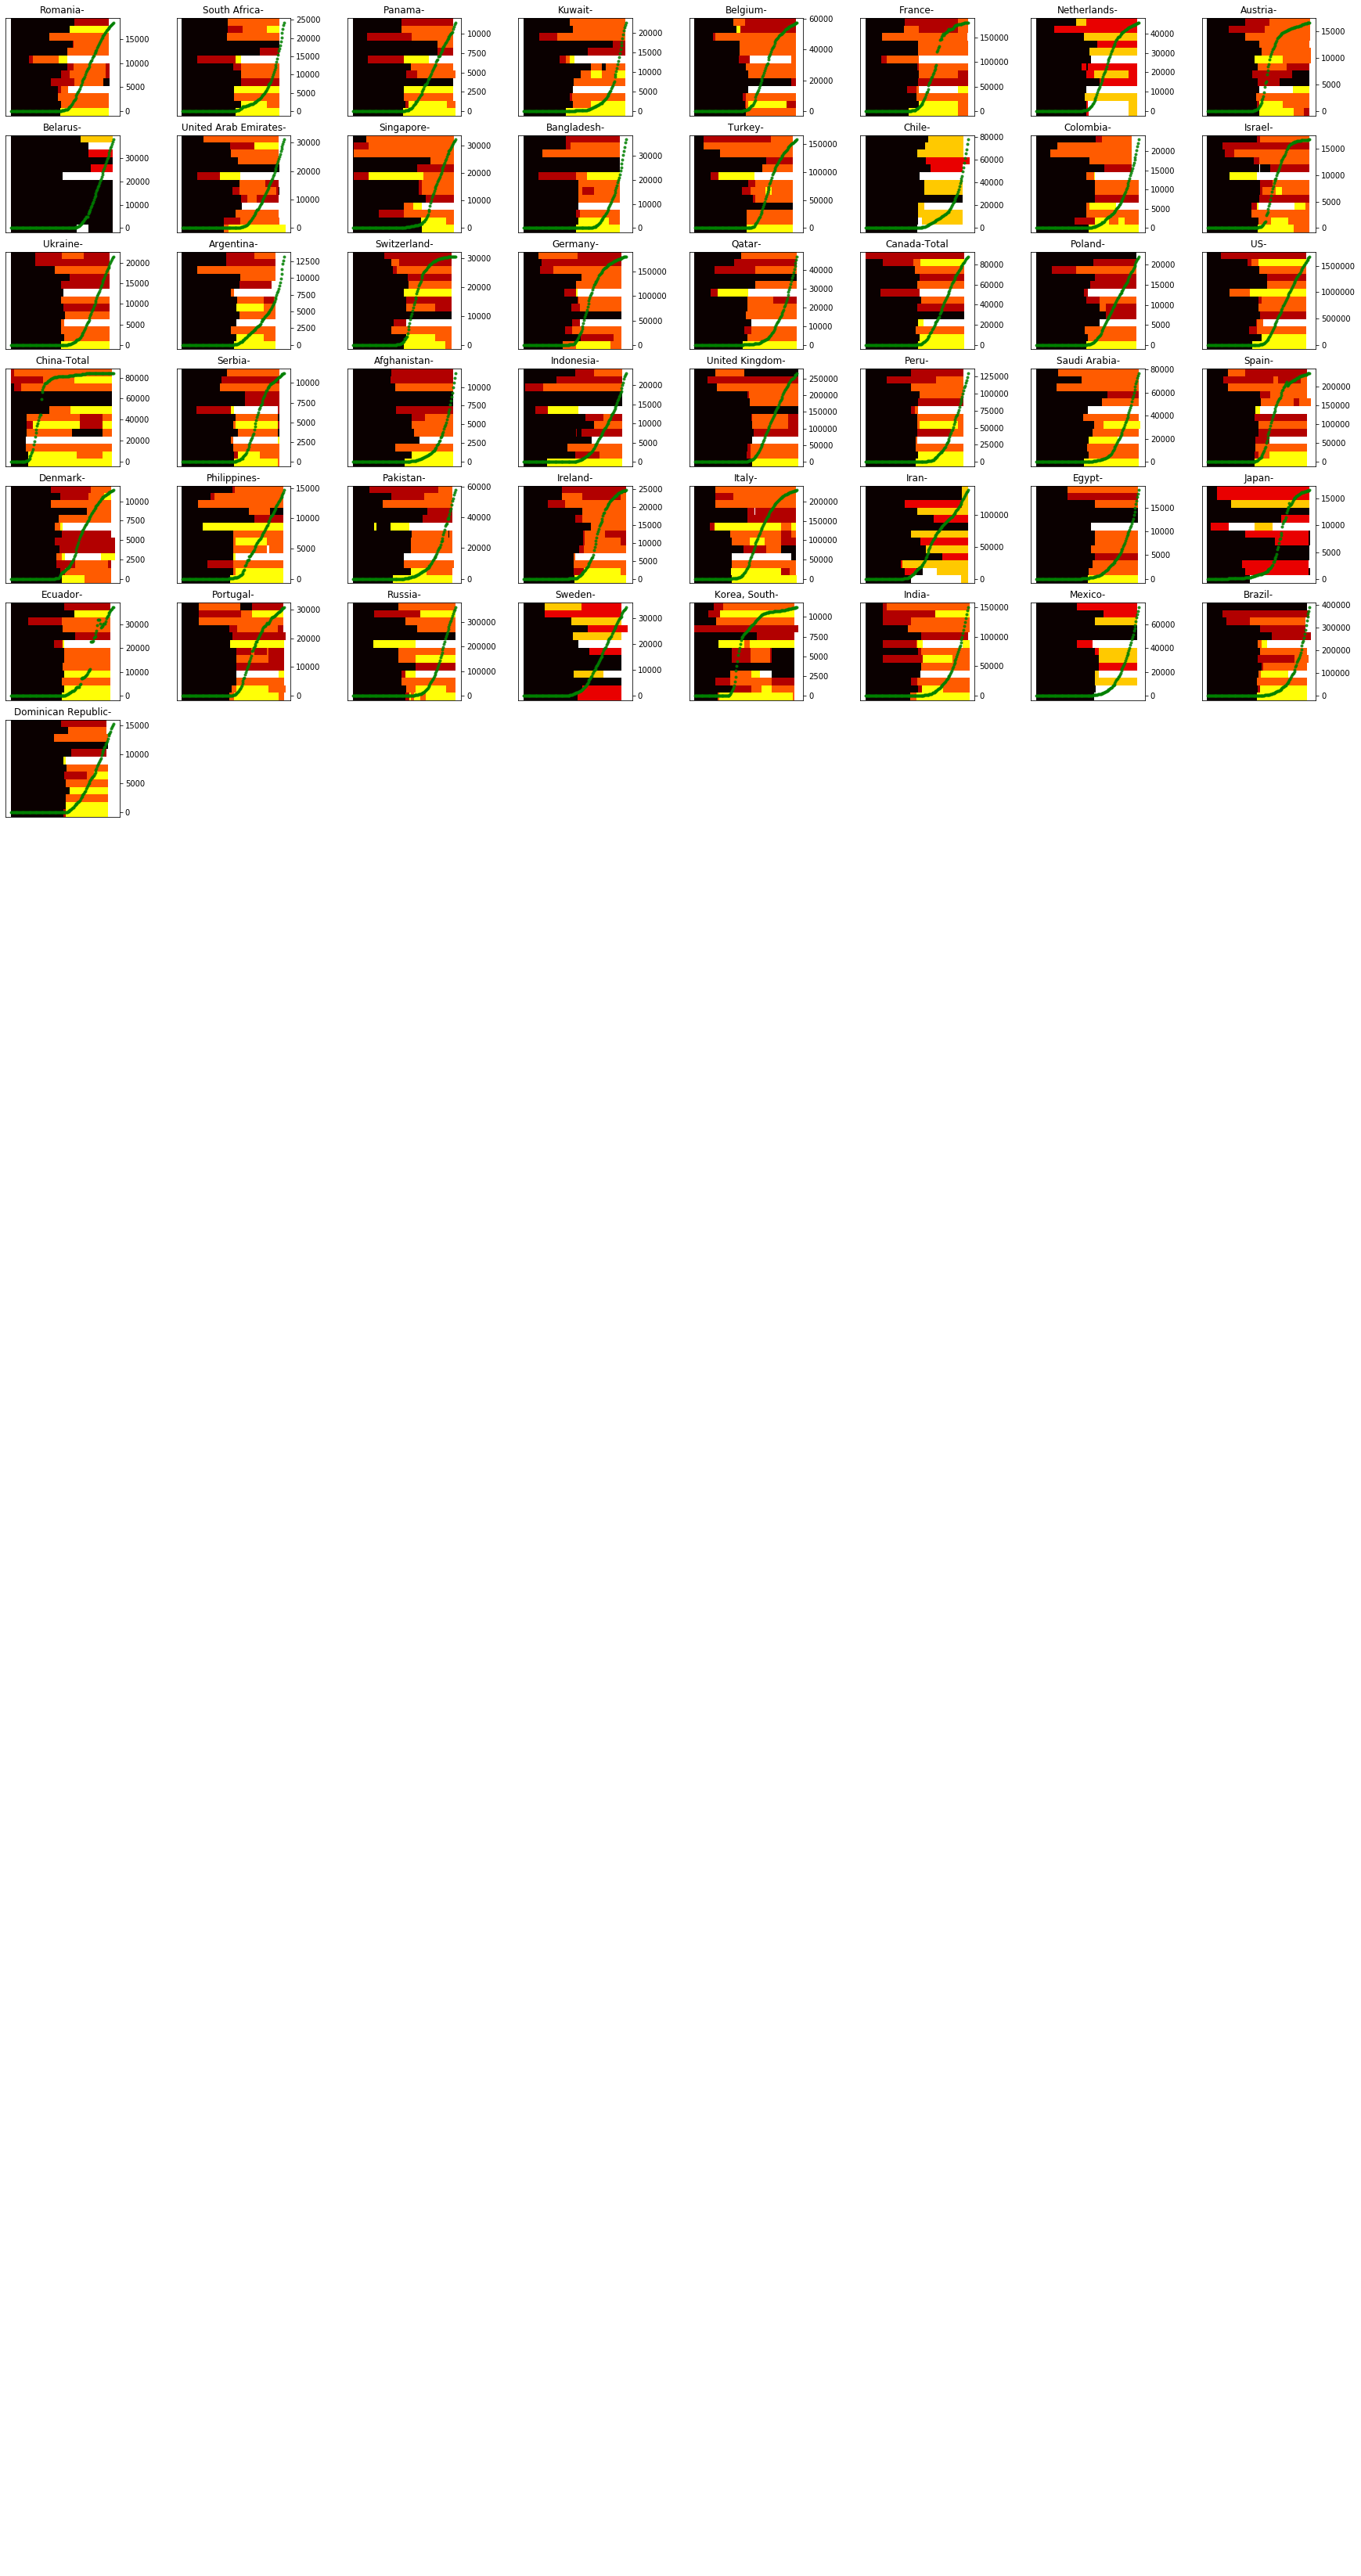

In [43]:

# print country data and corresponding JHU confirmed cases if available on same timescale
print("number of countries",len(countrycodes))
max_rows=22
max_cols=8
fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(30,60))
for idx, countrycode  in enumerate(countrycodes):
    foo = get_codedat(countrycode)
    # print(np.transpose(foo) # NB need to transpose to get dates on x axis
    foo = [f[1:] for f in foo]
    
    countrynames = [dd['CountryName'] for dd in oxdat if dd['CountryCode']==countrycode]
    countryname = countrynames[0]
    if (countryname,'') not in countries_jhu:
        # print(countryname)
        countryname = country_Oxford_JHU[(countryname,'')]
    row = idx // max_cols
    col = idx % max_cols
    axes[row, col].axis("off")
    axes[row, col].imshow(np.transpose(foo),cmap='hot',aspect='auto',interpolation='none',origin='lower')
    # axes[row, col].pcolor(np.transpose(foo),cmap='hot')
    # print(countryname)
    # xxx=range(len(np.transpose(foo)[0]))
    axes2=axes[row, col].twinx
    plotCountry(countryname, datatype='confirmed', fittype=None,ax=axes[row,col],ax2=axes2,
                symbol='.',firstdate='01/01/20',lastdate='05/21/20',intdates=True,linecolor='green')

for idx in range(len(countrycodes),max_rows*max_cols):
    row = idx // max_cols
    col = idx % max_cols
    axes[row, col].axis("off")
    
plt.subplots_adjust(wspace=.5, hspace=.2)
plt.show()